In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

In [2]:
# importing dataset
dataset = pd.read_csv('data/data_reddit.csv')
dataset_copy = pd.read_csv('data/data_reddit_copy.csv')
# checking whether the dataset has been imported correctly or not
dataset.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


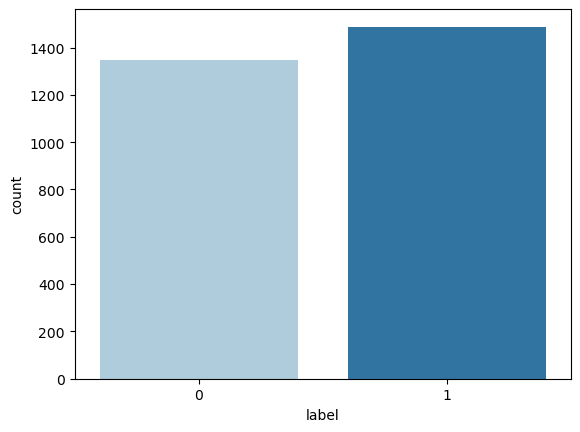

Percentage of no stress is 47.51322751322751
Percentage of stress is 52.48677248677248


In [3]:
# Data Cleaning
# Step 1: Selecting required columns
stress_analysis = dataset[['label',
                           'lex_liwc_function',
                           'lex_liwc_pronoun', 
                           'lex_liwc_ppron',
                           'lex_liwc_i',
                           'lex_liwc_we',
                           'lex_liwc_you',
                           'lex_liwc_shehe',
                           'lex_liwc_they',
                           'lex_liwc_ipron',
                           'lex_liwc_article',
                           'lex_liwc_prep',
                           'lex_liwc_auxverb',
                           'lex_liwc_adverb',
                           'lex_liwc_conj',
                           'lex_liwc_negate',
                           'lex_liwc_verb',
                           'lex_liwc_adj',
                           'lex_liwc_compare',
                           'lex_liwc_interrog',
                           'lex_liwc_affect',
                           'lex_liwc_posemo',
                           'lex_liwc_negemo',
                           'lex_liwc_anx',
                           'lex_liwc_anger',
                           'lex_liwc_sad',
                           'lex_liwc_social',
                           'lex_liwc_family',
                           'lex_liwc_friend',
                           'lex_liwc_female',
                           'lex_liwc_male',
                           'lex_liwc_cogproc',
                           'lex_liwc_insight',
                           'lex_liwc_cause',
                           'lex_liwc_discrep',
                           'lex_liwc_tentat',
                           'lex_liwc_certain',
                           'lex_liwc_differ',
                           'lex_liwc_percept',
                           'lex_liwc_see',
                           'lex_liwc_hear',
                           'lex_liwc_feel',
                           'lex_liwc_bio',
                           'lex_liwc_body',
                           'lex_liwc_health',
                           'lex_liwc_sexual',
                           'lex_liwc_ingest',
                           'lex_liwc_focuspast',
                           'lex_liwc_focuspresent',
                           'lex_liwc_focusfuture',
                           'social_upvote_ratio',
                           'social_num_comments']]
# stress_analysis.head()


# Step 2: Removing duplicates if available
stress_analysis = stress_analysis.drop_duplicates()

# Step 3: Check if the dataset needs resampling of classes (imbalanced classes)
stress_analysis['label'].value_counts()
sns.countplot(x = 'label', data = stress_analysis, palette = 'Paired')
plt.show()

count_0 = len(stress_analysis[stress_analysis['label']==0])
count_1 = len(stress_analysis[stress_analysis['label']==1])
percent_0 = count_0/(count_0 + count_1)
print("Percentage of no stress is", percent_0 * 100)
percent_1 = count_1/(count_0 + count_1)
print("Percentage of stress is", percent_1 * 100)


# Step 4: Filling null values of each feature using mean
stress_analysis_mean = stress_analysis.mean(axis=0, skipna=True, numeric_only=False)
stress_analysis['label'] = stress_analysis['label'].fillna(stress_analysis['label'].mode())
for i in stress_analysis.iloc[1 : , 1 : ]:
    stress_analysis[i].fillna(value=stress_analysis_mean[i], inplace=True)
    
#stress_analysis.head()

In [4]:
# for linguistic styles and common grammar
stress_ling_com = stress_analysis.iloc[1 : , : 20].drop(columns = ['lex_liwc_function'])
#stress_ling_com.head()
stress_ling_com_X = preprocessing.StandardScaler().fit_transform(stress_ling_com.iloc[1 : , 1 : 20])
#print(stress_ling_com_X)
stress_ling_com_y = stress_ling_com.iloc[1 : , 0]
#print(stress_ling_com_y)

In [5]:
# split into train and test data
stress_ling_com_X_train, stress_ling_com_X_test, stress_ling_com_y_train, stress_ling_com_y_test = train_test_split(stress_ling_com_X, stress_ling_com_y, test_size=0.30)

In [6]:
# logistic regression
stress_ling_com_logreg = LogisticRegression()
stress_ling_com_logreg.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_logreg.predict(stress_ling_com_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))

Accuracy of logistic regression classifier on test set: 0.6718


[[240 146]
 [143 321]]

 Precision of the model: 
0.6873661670235546

 Recall of the model: 
0.6918103448275862
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       386
           1       0.69      0.69      0.69       464

    accuracy                           0.66       850
   macro avg       0.66      0.66      0.66       850
weighted avg       0.66      0.66      0.66       850



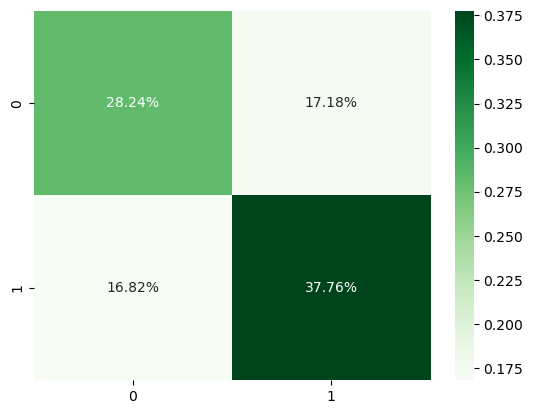

In [108]:
# calculating confusion matrix, precision, recall, ROC curve for logistic regression
# confusion matrix
cf_matrix = confusion_matrix(stress_ling_com_y_test, stress_ling_com_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_ling_com_y_test, stress_ling_com_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_ling_com_y_test, stress_ling_com_y_pred)
print('\n Recall of the model: ')
print(recall)
print(classification_report(stress_ling_com_y_test, stress_ling_com_y_pred))

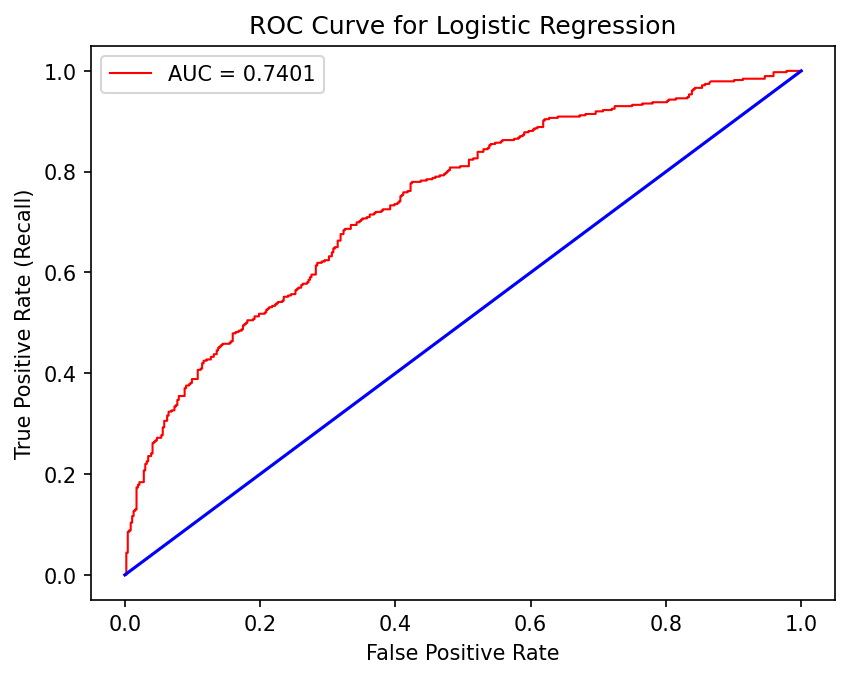

In [8]:
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_logreg.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [148]:
# gaussian Naive Bayes
stress_ling_com_gaussianNB = GaussianNB()
stress_ling_com_gaussianNB.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_gaussianNB.predict(stress_ling_com_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))
print(classification_report(stress_ling_com_y_test, stress_ling_com_y_pred))

Accuracy of gaussian naive bayes classifier on test set: 0.6718
              precision    recall  f1-score   support

           0       0.66      0.56      0.61       386
           1       0.68      0.77      0.72       464

    accuracy                           0.67       850
   macro avg       0.67      0.66      0.66       850
weighted avg       0.67      0.67      0.67       850



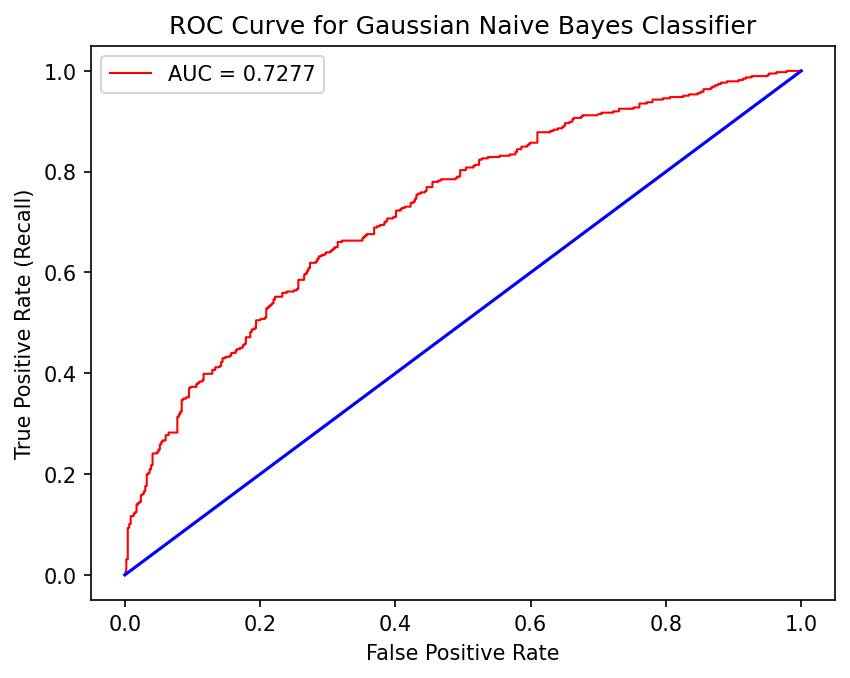

In [10]:
# calculating ROC Curve for Gaussian Naive Bayes Classifier
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_gaussianNB.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [149]:
# decision tree classifier
stress_ling_com_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_ling_com_dectree.fit(stress_ling_com_X_train,stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_dectree.predict(stress_ling_com_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))
print(classification_report(stress_ling_com_y_test, stress_ling_com_y_pred))

Accuracy of decision tree classifier on test set: 0.5988
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       386
           1       0.63      0.62      0.63       464

    accuracy                           0.60       850
   macro avg       0.60      0.60      0.60       850
weighted avg       0.60      0.60      0.60       850



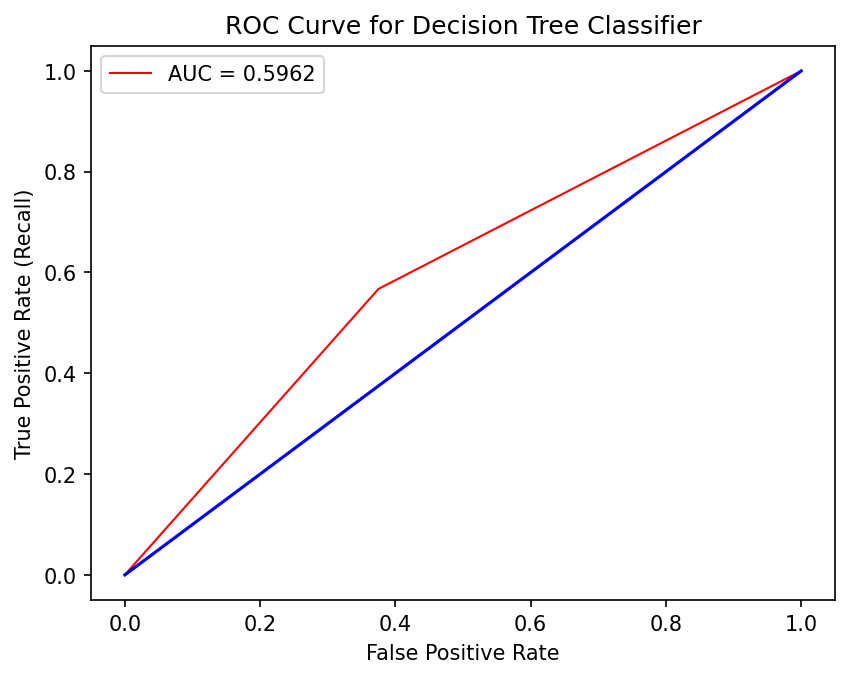

In [12]:
# calculating ROC curve for decision tree classifier
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_dectree.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [150]:
# support vector machines with linear kernel
stress_ling_com_svm = svm.SVC(kernel="linear", C = 1)
stress_ling_com_svm.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_svm.predict(stress_ling_com_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))
print(classification_report(stress_ling_com_y_test, stress_ling_com_y_pred))

Accuracy of support vector machine on test set: 0.6765
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       386
           1       0.70      0.72      0.71       464

    accuracy                           0.68       850
   macro avg       0.67      0.67      0.67       850
weighted avg       0.68      0.68      0.68       850



In [151]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_ling_com_X_train, stress_ling_com_y_train)
y_pred_final = ensemble_final_model.predict(stress_ling_com_X_test)
print(log_loss(stress_ling_com_y_pred, y_pred_final))
print('Accuracy of ensemble method using Voting Classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))
print(classification_report(stress_ling_com_y_test, stress_ling_com_y_pred))

0.6907774093039327
Accuracy of ensemble method using Voting Classifier on test set: 0.6765
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       386
           1       0.70      0.72      0.71       464

    accuracy                           0.68       850
   macro avg       0.67      0.67      0.67       850
weighted avg       0.68      0.68      0.68       850



In [152]:
# ensemble method using BaggingClassifier()
stress_ling_com_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_ling_com_bagging.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_bagging.predict(stress_ling_com_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))
print(classification_report(stress_ling_com_y_test, stress_ling_com_y_pred))

Accuracy of ensemble method using Bagging Classifier on test set: 0.6529
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       386
           1       0.69      0.67      0.68       464

    accuracy                           0.65       850
   macro avg       0.65      0.65      0.65       850
weighted avg       0.65      0.65      0.65       850



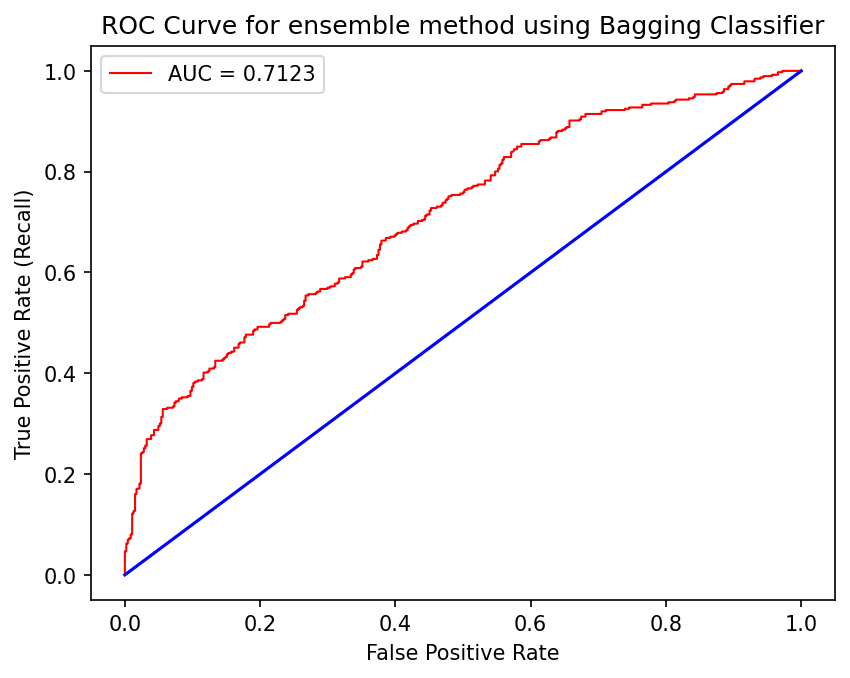

In [17]:
# calculating ROC curve for ensemble method using Bagging Classifier
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_bagging.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for ensemble method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [153]:
# ensemble method using BoostingClassifier()
stress_ling_com_boosting = GradientBoostingClassifier() 
stress_ling_com_boosting.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_boosting.predict(stress_ling_com_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))
print(classification_report(stress_ling_com_y_test, stress_ling_com_y_pred))

Accuracy of ensemble method using Boosting Classifier on test set: 0.6600
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       386
           1       0.69      0.69      0.69       464

    accuracy                           0.66       850
   macro avg       0.66      0.66      0.66       850
weighted avg       0.66      0.66      0.66       850



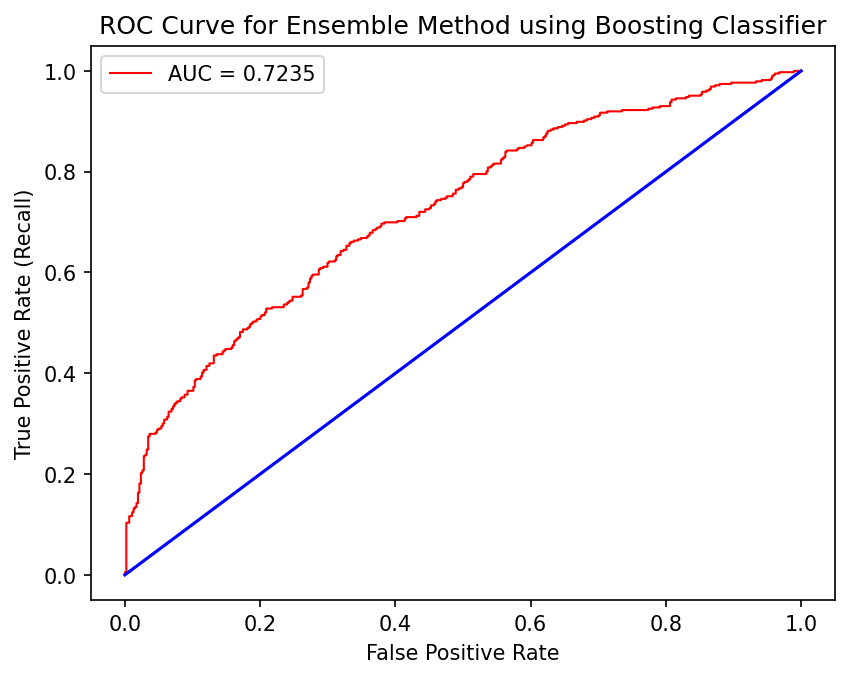

In [19]:
# calculating ROC curve for ensemble method using Boosting Classifier
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_boosting.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [20]:
# for psychological processes
stress_psycho_X = preprocessing.StandardScaler().fit_transform(stress_analysis.iloc[1 : , 21 : 26])
#print(stress_psycho_X)
stress_psycho_y = stress_analysis.iloc[1 : , 0]
#print(stress_psycho_y)

In [21]:
# split into train and test data
stress_psycho_X_train, stress_psycho_X_test, stress_psycho_y_train, stress_psycho_y_test = train_test_split(stress_psycho_X, stress_psycho_y, test_size=0.30)

In [22]:
# logistic regression
stress_psycho_logreg = LogisticRegression()
stress_psycho_logreg.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_logreg.predict(stress_psycho_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))

Accuracy of logistic regression classifier on test set: 0.7039


[[260 136]
 [126 329]]

 Precision of the model: 
0.7075268817204301

 Recall of the model: 
0.7230769230769231
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       396
           1       0.71      0.72      0.72       455

    accuracy                           0.69       851
   macro avg       0.69      0.69      0.69       851
weighted avg       0.69      0.69      0.69       851



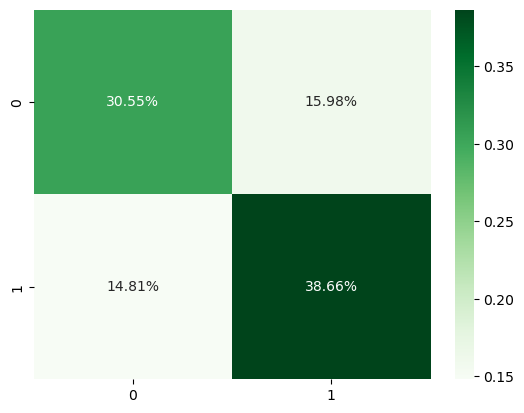

In [111]:
# calculating confusion matrix, precision, recall, ROC curve for logistic regression
# confusion matrix
cf_matrix = confusion_matrix(stress_psycho_y_test, stress_psycho_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_psycho_y_test, stress_psycho_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_psycho_y_test, stress_psycho_y_pred)
print('\n Recall of the model: ')
print(recall)
print(classification_report(stress_psycho_y_test, stress_psycho_y_pred))

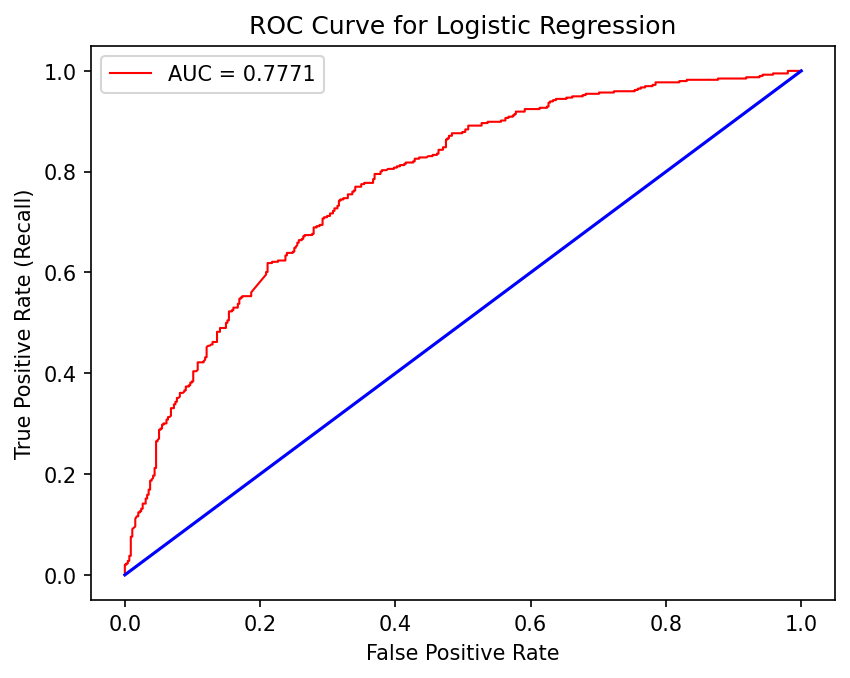

In [24]:
# ROC Curve
stress_psycho_y_prob = stress_psycho_logreg.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [154]:
# gaussian naive bayes
stress_psycho_gaussianNB = GaussianNB()
stress_psycho_gaussianNB.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_gaussianNB.predict(stress_psycho_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))
print(classification_report(stress_psycho_y_test, stress_psycho_y_pred))

Accuracy of gaussian naive bayes classifier on test set: 0.6675
              precision    recall  f1-score   support

           0       0.60      0.82      0.70       396
           1       0.78      0.53      0.63       455

    accuracy                           0.67       851
   macro avg       0.69      0.68      0.66       851
weighted avg       0.70      0.67      0.66       851



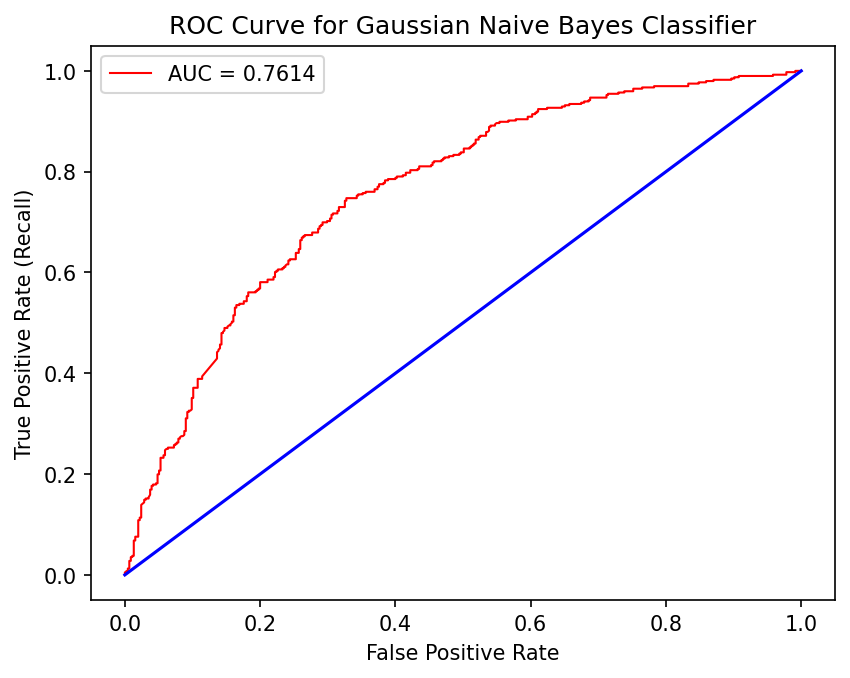

In [26]:
# calculating ROC curve for Gaussian Naive Bayes Classifier
# ROC Curve
stress_psycho_y_prob = stress_psycho_gaussianNB.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [155]:
# decision tree classifier
stress_psycho_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_psycho_dectree.fit(stress_psycho_X_train,stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_dectree.predict(stress_psycho_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))
print(classification_report(stress_psycho_y_test, stress_psycho_y_pred))

Accuracy of decision tree classifier on test set: 0.6533
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       396
           1       0.68      0.66      0.67       455

    accuracy                           0.65       851
   macro avg       0.65      0.65      0.65       851
weighted avg       0.65      0.65      0.65       851



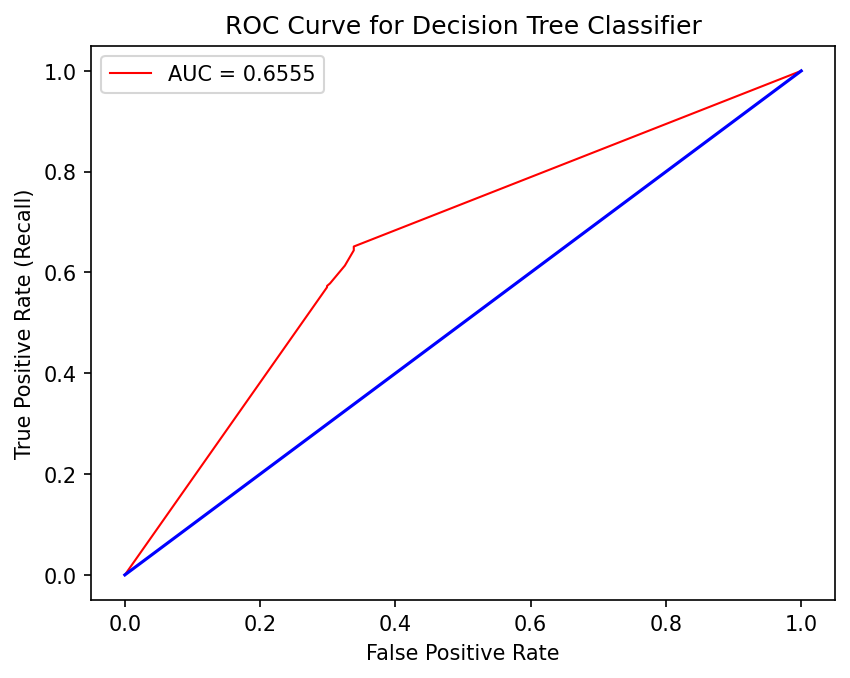

In [109]:
# calculating ROC curve for decision tree classifier
# ROC Curve
stress_psycho_y_prob = stress_psycho_dectree.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [156]:
# support vector machines with linear kernel
stress_psycho_svm = svm.SVC(kernel="linear")
stress_psycho_svm.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_svm.predict(stress_psycho_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))
print(classification_report(stress_psycho_y_test, stress_psycho_y_pred))

Accuracy of support vector machine on test set: 0.7074
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       396
           1       0.75      0.68      0.71       455

    accuracy                           0.71       851
   macro avg       0.71      0.71      0.71       851
weighted avg       0.71      0.71      0.71       851



In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [157]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_psycho_X_train, stress_psycho_y_train)
y_pred_final = ensemble_final_model.predict(stress_psycho_X_test)
print(log_loss(stress_psycho_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))
print(classification_report(stress_psycho_y_test, stress_psycho_y_pred))

0.689976960138079
Accuracy of ensemble method (Voting Classifier) on test set: 0.7074
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       396
           1       0.75      0.68      0.71       455

    accuracy                           0.71       851
   macro avg       0.71      0.71      0.71       851
weighted avg       0.71      0.71      0.71       851



In [158]:
# ensemble method using BaggingClassifier()
stress_psycho_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_psycho_bagging.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_bagging.predict(stress_psycho_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))
print(classification_report(stress_psycho_y_test, stress_psycho_y_pred))

Accuracy of ensemble method using Bagging Classifier on test set: 0.6886
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       396
           1       0.71      0.71      0.71       455

    accuracy                           0.69       851
   macro avg       0.69      0.69      0.69       851
weighted avg       0.69      0.69      0.69       851



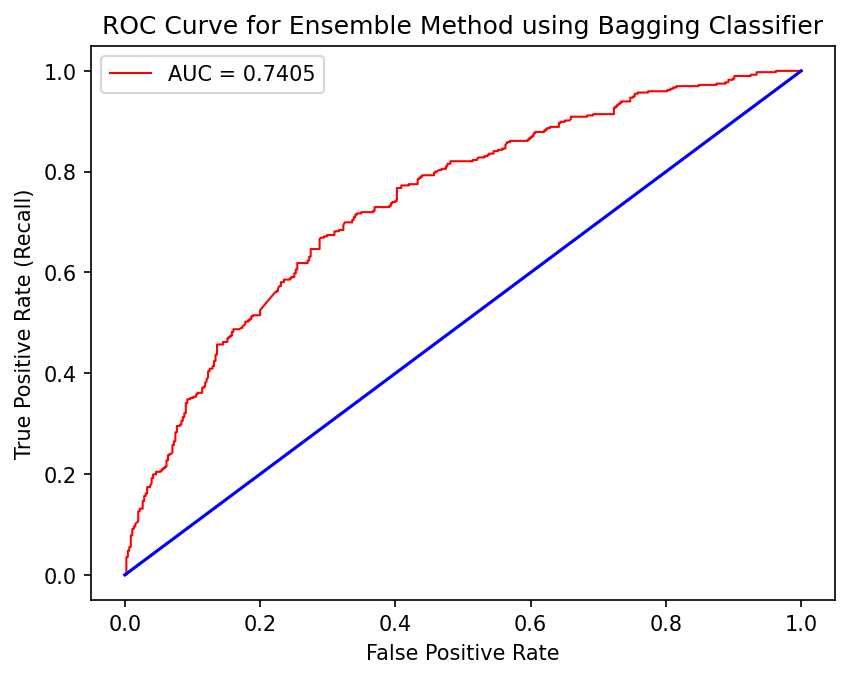

In [33]:
# calculating ROC curve for ensemble method using Bagging Classifier
# ROC Curve
stress_psycho_y_prob = stress_psycho_bagging.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [159]:
# ensemble method using BoostingClassifier()
stress_psycho_boosting = GradientBoostingClassifier() 
stress_psycho_boosting.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_boosting.predict(stress_psycho_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))
print(classification_report(stress_psycho_y_test, stress_psycho_y_pred))

Accuracy of ensemble method using Boosting Classifier on test set: 0.6933
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       396
           1       0.71      0.73      0.72       455

    accuracy                           0.69       851
   macro avg       0.69      0.69      0.69       851
weighted avg       0.69      0.69      0.69       851



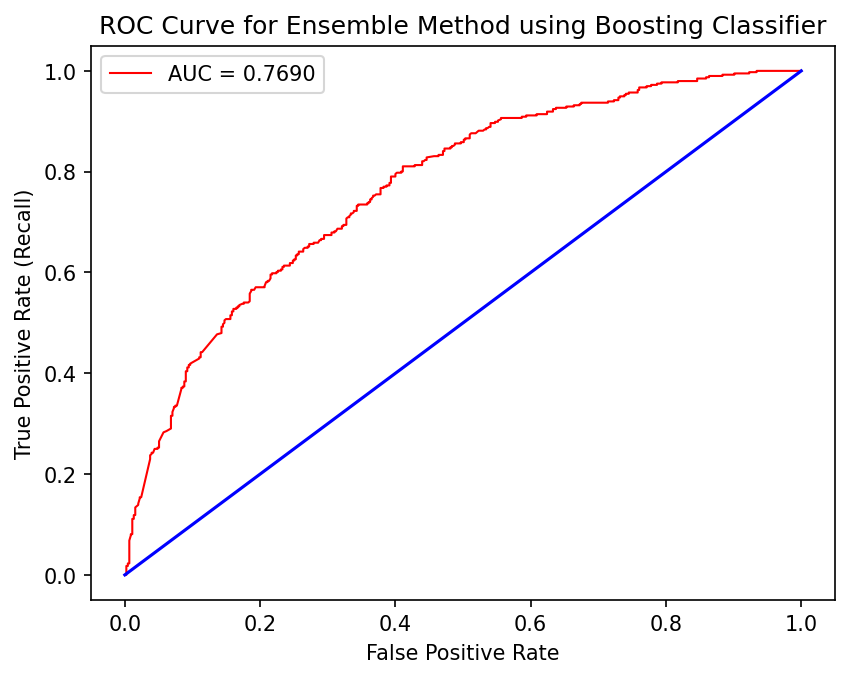

In [110]:
# calculating ROC curve for ensemble method using Boosting Classifier
# ROC Curve
stress_psycho_y_prob = stress_psycho_boosting.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [36]:
# for social processes
stress_social_X = preprocessing.StandardScaler().fit_transform(stress_analysis.iloc[1 : , 27 : 31])
print(stress_social_X)
stress_social_y = stress_analysis.iloc[1 : , 0]
print(stress_social_y)

[[-0.49994508 -0.52961973 -0.54706538 -0.6359895 ]
 [-0.09798631  2.88994739  0.07663192  0.13527385]
 [-0.25207051  0.5181585  -0.41886093  1.95416992]
 ...
 [-0.49994508 -0.52961973 -0.54706538 -0.6359895 ]
 [ 1.46965288 -0.52961973  2.50905139 -0.6359895 ]
 [ 3.02389345 -0.52961973  4.31777356 -0.6359895 ]]
1       0
2       1
3       1
4       1
5       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2834, dtype: int64


In [37]:
# split into train and test data
stress_social_X_train, stress_social_X_test, stress_social_y_train, stress_social_y_test = train_test_split(stress_social_X, stress_social_y, test_size=0.30)

In [38]:
# logistic regression
stress_social_logreg = LogisticRegression()
stress_social_logreg.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_logreg.predict(stress_social_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))

Accuracy of logistic regression classifier on test set: 0.5511


[[119 270]
 [111 351]]

 Precision of the model: 
0.5652173913043478

 Recall of the model: 
0.7597402597402597
              precision    recall  f1-score   support

           0       0.52      0.31      0.38       389
           1       0.57      0.76      0.65       462

    accuracy                           0.55       851
   macro avg       0.54      0.53      0.52       851
weighted avg       0.54      0.55      0.53       851



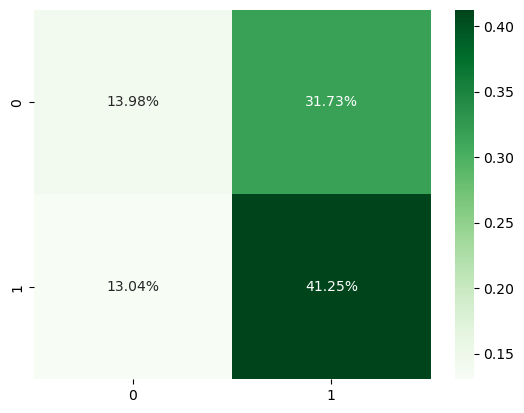

In [112]:
# calculating confusion matrix, precision, recall, ROC curve for Logistic Regression
# confusion matrix
cf_matrix = confusion_matrix(stress_social_y_test, stress_social_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_social_y_test, stress_social_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_social_y_test, stress_social_y_pred)
print('\n Recall of the model: ')
print(recall)
print(classification_report(stress_social_y_test, stress_social_y_pred))

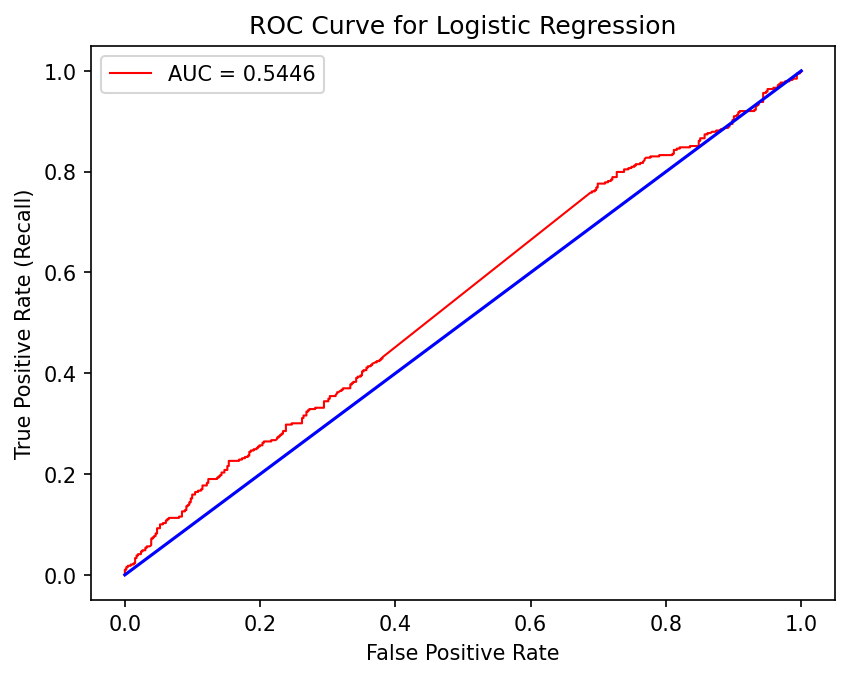

In [40]:
# ROC Curve
stress_social_y_prob = stress_social_logreg.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [163]:
# gaussian naive bayes
stress_social_gaussianNB = GaussianNB()
stress_social_gaussianNB.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_gaussianNB.predict(stress_social_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))
print(classification_report(stress_social_y_test, stress_social_y_pred))

Accuracy of gaussian naive bayes classifier on test set: 0.5511
              precision    recall  f1-score   support

           0       0.52      0.25      0.34       389
           1       0.56      0.80      0.66       462

    accuracy                           0.55       851
   macro avg       0.54      0.53      0.50       851
weighted avg       0.54      0.55      0.51       851



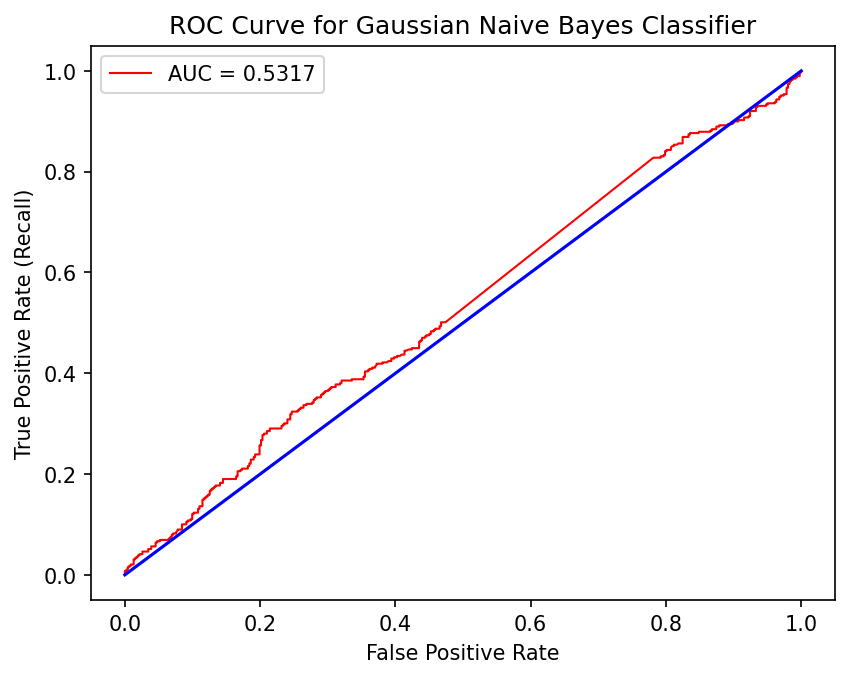

In [42]:
# calculating ROC curve for Gaussian Naive Bayes Classifier
# ROC Curve
stress_social_y_prob = stress_social_gaussianNB.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.plot([0, 1], [0, 1], color = 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [167]:
# decision tree classifier
stress_social_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_social_dectree.fit(stress_social_X_train,stress_social_y_train)
stress_social_y_pred = stress_social_dectree.predict(stress_social_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))
print(classification_report(stress_social_y_test, stress_social_y_pred))

Accuracy of decision tree classifier on test set: 0.5405
              precision    recall  f1-score   support

           0       0.50      0.37      0.42       389
           1       0.56      0.69      0.62       462

    accuracy                           0.54       851
   macro avg       0.53      0.53      0.52       851
weighted avg       0.53      0.54      0.53       851



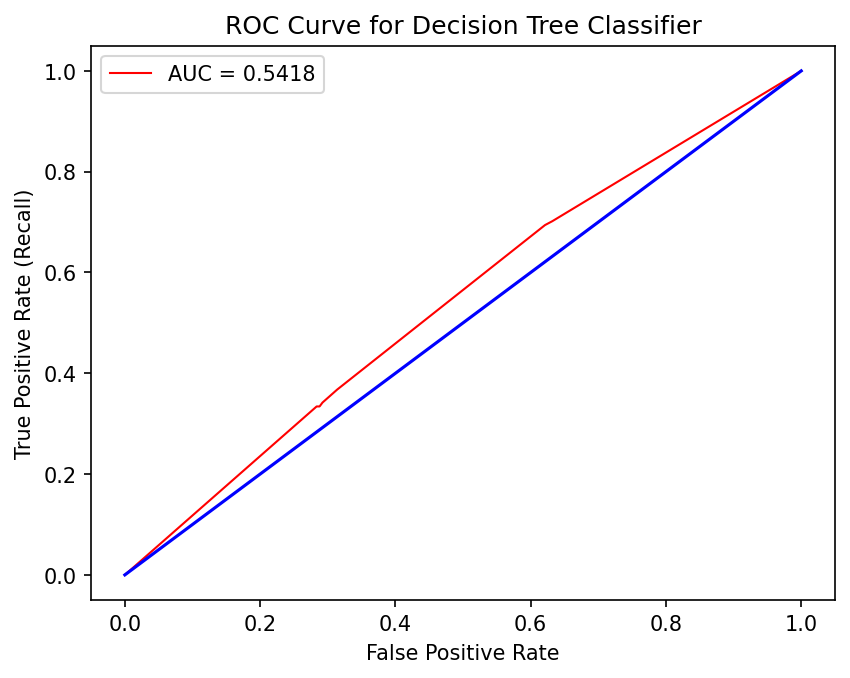

In [44]:
# calculating ROC curve for Decision Tree classifier
# ROC Curve
stress_social_y_prob = stress_social_dectree.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [166]:
# support vector machines with linear kernel
stress_social_svm = svm.SVC(kernel="linear")
stress_social_svm.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_svm.predict(stress_social_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))
print(classification_report(stress_social_y_test, stress_social_y_pred))

Accuracy of support vector machine on test set: 0.5558
              precision    recall  f1-score   support

           0       0.54      0.18      0.27       389
           1       0.56      0.87      0.68       462

    accuracy                           0.56       851
   macro avg       0.55      0.53      0.47       851
weighted avg       0.55      0.56      0.49       851



In [168]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_social_X_train, stress_social_y_train)
y_pred_final = ensemble_final_model.predict(stress_social_X_test)
print(log_loss(stress_social_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))
print(classification_report(stress_social_y_test, stress_social_y_pred))

10.187291185234216
Accuracy of ensemble method (Voting Classifier) on test set: 0.5405
              precision    recall  f1-score   support

           0       0.50      0.37      0.42       389
           1       0.56      0.69      0.62       462

    accuracy                           0.54       851
   macro avg       0.53      0.53      0.52       851
weighted avg       0.53      0.54      0.53       851



In [169]:
# ensemble method using BaggingClassifier()
stress_social_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_social_bagging.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_bagging.predict(stress_social_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))
print(classification_report(stress_social_y_test, stress_social_y_pred))

Accuracy of ensemble method using Bagging Classifier on test set: 0.5347
              precision    recall  f1-score   support

           0       0.49      0.35      0.41       389
           1       0.56      0.69      0.62       462

    accuracy                           0.53       851
   macro avg       0.52      0.52      0.51       851
weighted avg       0.53      0.53      0.52       851



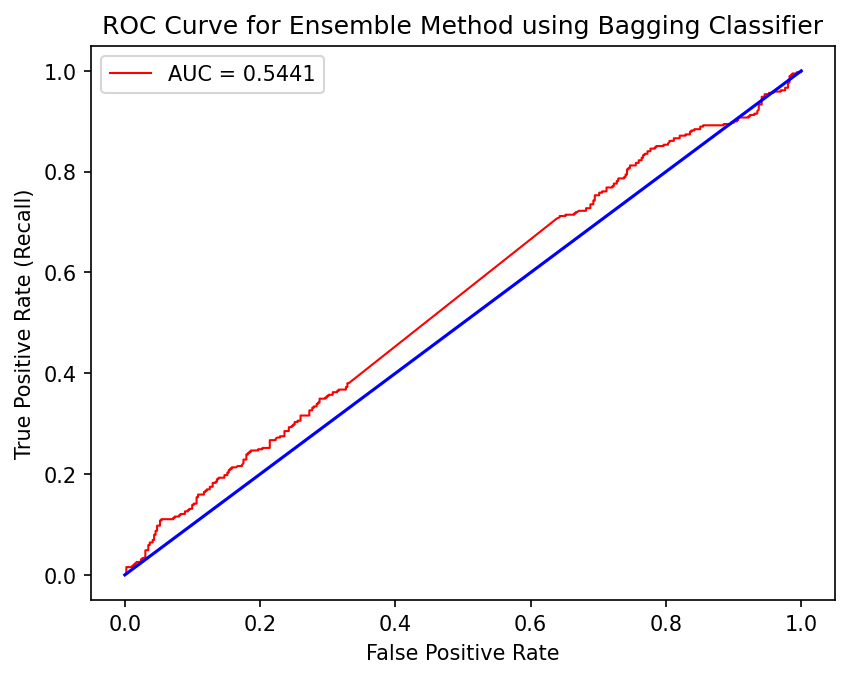

In [48]:
# calculating ROC curve for ensemble method using Bagging Classifier
# ROC Curve
stress_social_y_prob = stress_social_bagging.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [170]:
# ensemble method using BoostingClassifier()
stress_social_boosting = GradientBoostingClassifier() 
stress_social_boosting.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_boosting.predict(stress_social_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))
print(classification_report(stress_social_y_test, stress_social_y_pred))

Accuracy of ensemble method using Boosting Classifier on test set: 0.5535
              precision    recall  f1-score   support

           0       0.52      0.31      0.39       389
           1       0.57      0.76      0.65       462

    accuracy                           0.55       851
   macro avg       0.54      0.53      0.52       851
weighted avg       0.54      0.55      0.53       851



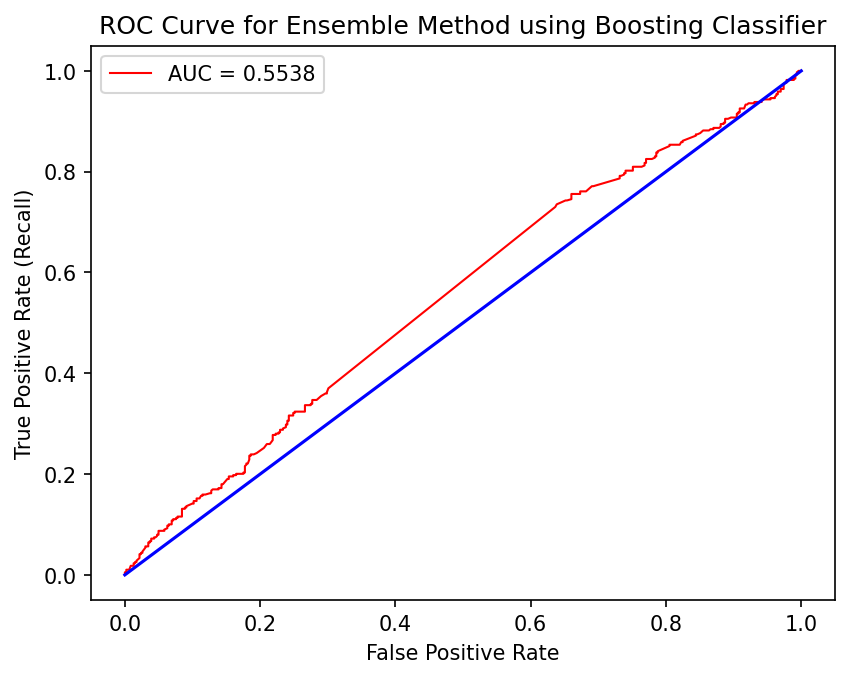

In [50]:
# calculating ROC curve for ensemble method using Boosting Classifier
# ROC Curve
stress_social_y_prob = stress_social_boosting.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [51]:
# for cognitive processes
stress_cog_X = preprocessing.StandardScaler().fit_transform(stress_analysis.iloc[1 : , 32 : 38])
print(stress_cog_X)
stress_cog_y = stress_analysis.iloc[1 : , 0]
print(stress_cog_y)

[[-0.4545323  -1.04034592  0.88973845  0.85523701  0.17912644  0.96314646]
 [ 0.59502116 -0.31685493 -0.69375429 -0.13079195 -0.97148123 -0.85575773]
 [ 2.15156232 -0.60022223 -0.0593256  -0.58648661 -0.04722261  0.3096008 ]
 ...
 [-0.27219462 -1.04034592  0.15215063 -0.42542212  0.90847338 -0.68252876]
 [ 0.69286089 -1.04034592  0.5132076  -0.15043396 -0.97148123  1.32928952]
 [-0.49011038 -1.04034592 -0.10058926 -1.30538422 -0.97148123  1.19936779]]
1       0
2       1
3       1
4       1
5       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2834, dtype: int64


In [52]:
# split into train and test data
stress_cog_X_train, stress_cog_X_test, stress_cog_y_train, stress_cog_y_test = train_test_split(stress_cog_X, stress_cog_y, test_size=0.30)

In [171]:
# logistic regression
stress_cog_logreg = LogisticRegression()
stress_cog_logreg.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_logreg.predict(stress_cog_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))
print(classification_report(stress_cog_y_test, stress_cog_y_pred))

Accuracy of logistic regression classifier on test set: 0.5605
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       393
           1       0.59      0.62      0.60       458

    accuracy                           0.56       851
   macro avg       0.56      0.56      0.56       851
weighted avg       0.56      0.56      0.56       851



[[195 198]
 [176 282]]

 Precision of the model: 
0.5875

 Recall of the model: 
0.6157205240174672
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       393
           1       0.59      0.62      0.60       458

    accuracy                           0.56       851
   macro avg       0.56      0.56      0.56       851
weighted avg       0.56      0.56      0.56       851



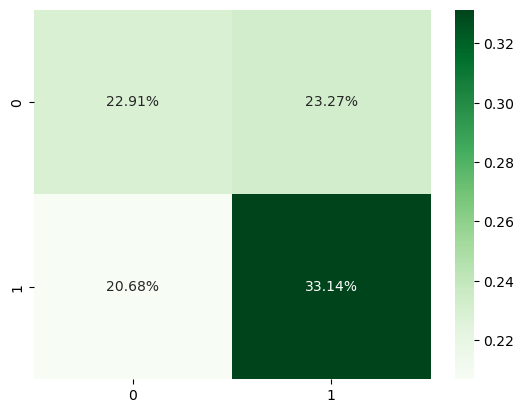

In [172]:
# calculating confusion matrix, precision, recall, ROC curve for logistic regression
# confusion matrix
cf_matrix = confusion_matrix(stress_cog_y_test, stress_cog_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Recall of the model: ')
print(recall)
print(classification_report(stress_cog_y_test, stress_cog_y_pred))

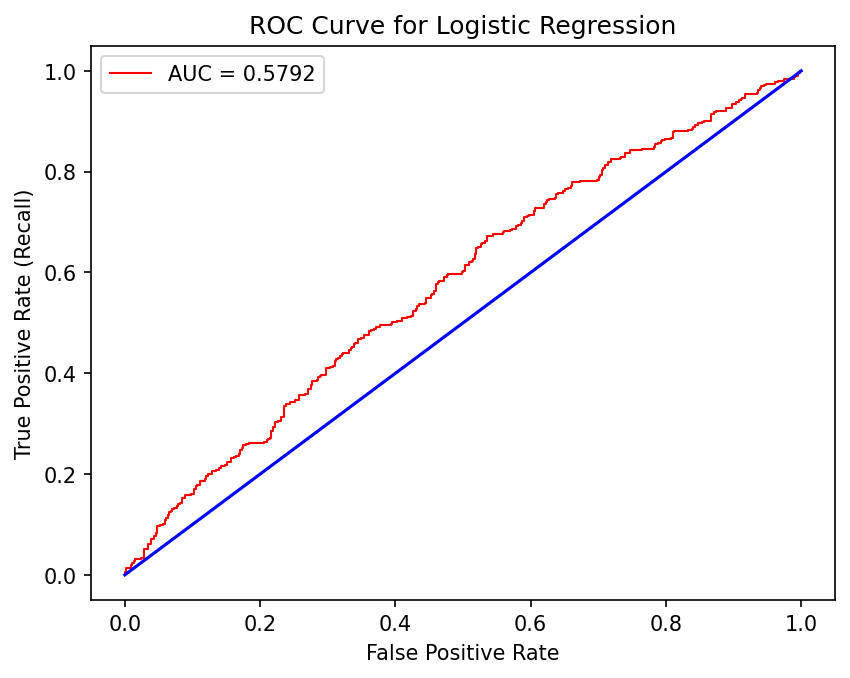

In [116]:
# ROC Curve
stress_cog_y_prob = stress_cog_logreg.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [173]:
# gaussian naive bayes
stress_cog_gaussianNB = GaussianNB()
stress_cog_gaussianNB.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_gaussianNB.predict(stress_cog_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))
print(classification_report(stress_cog_y_test, stress_cog_y_pred))

Accuracy of gaussian naive bayes classifier on test set: 0.5617
              precision    recall  f1-score   support

           0       0.52      0.58      0.55       393
           1       0.60      0.55      0.57       458

    accuracy                           0.56       851
   macro avg       0.56      0.56      0.56       851
weighted avg       0.57      0.56      0.56       851



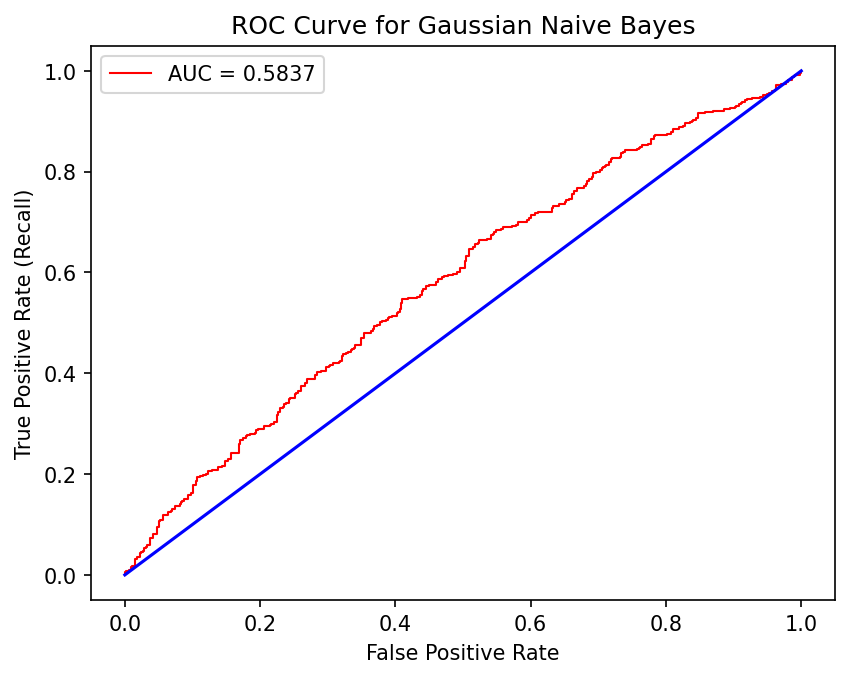

In [56]:
# ROC Curve
stress_cog_y_prob = stress_cog_gaussianNB.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [174]:
# decision tree classifier
stress_cog_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_cog_dectree.fit(stress_cog_X_train,stress_cog_y_train)
stress_cog_y_pred = stress_cog_dectree.predict(stress_cog_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))
print(classification_report(stress_cog_y_test, stress_cog_y_pred))

Accuracy of decision tree classifier on test set: 0.5300
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       393
           1       0.57      0.55      0.56       458

    accuracy                           0.53       851
   macro avg       0.53      0.53      0.53       851
weighted avg       0.53      0.53      0.53       851



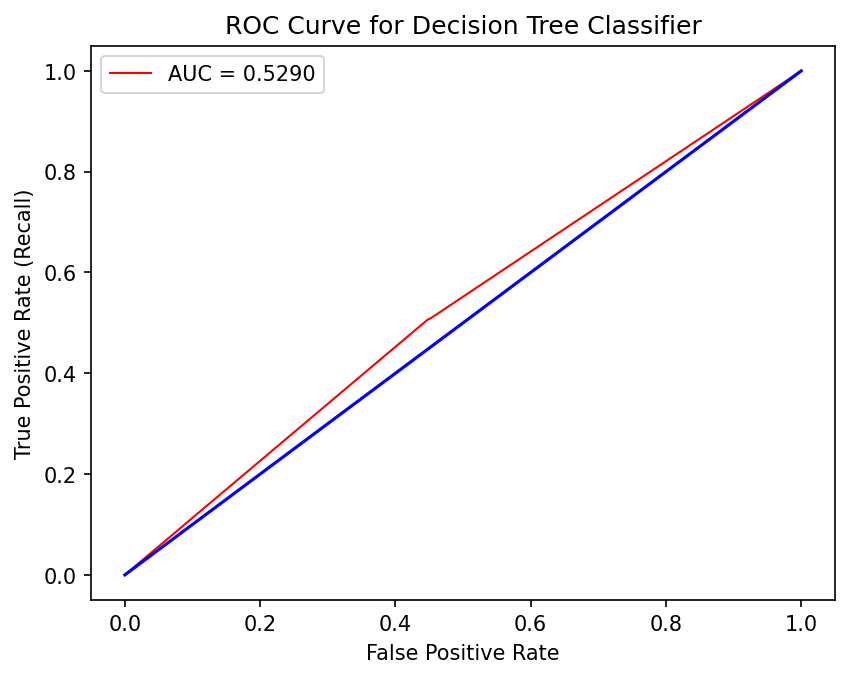

In [58]:
# ROC Curve
stress_cog_y_prob = stress_cog_dectree.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [175]:
# support vector machines with linear kernel
stress_cog_svm = svm.SVC(kernel="linear")
stress_cog_svm.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_svm.predict(stress_cog_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))
print(classification_report(stress_cog_y_test, stress_cog_y_pred))

Accuracy of support vector machine on test set: 0.5570
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       393
           1       0.59      0.58      0.58       458

    accuracy                           0.56       851
   macro avg       0.56      0.56      0.56       851
weighted avg       0.56      0.56      0.56       851



In [176]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_cog_X_train, stress_cog_y_train)
y_pred_final = ensemble_final_model.predict(stress_cog_X_test)
print(log_loss(stress_cog_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))
print(classification_report(stress_cog_y_test, stress_cog_y_pred))

0.6899788393329794
Accuracy of ensemble method (Voting Classifier) on test set: 0.5570
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       393
           1       0.59      0.58      0.58       458

    accuracy                           0.56       851
   macro avg       0.56      0.56      0.56       851
weighted avg       0.56      0.56      0.56       851



In [177]:
# ensemble method using BaggingClassifier()
stress_cog_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_cog_bagging.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_bagging.predict(stress_cog_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))
print(classification_report(stress_cog_y_test, stress_cog_y_pred))

Accuracy of ensemble method using Bagging Classifier on test set: 0.5300
              precision    recall  f1-score   support

           0       0.49      0.48      0.49       393
           1       0.56      0.57      0.57       458

    accuracy                           0.53       851
   macro avg       0.53      0.53      0.53       851
weighted avg       0.53      0.53      0.53       851



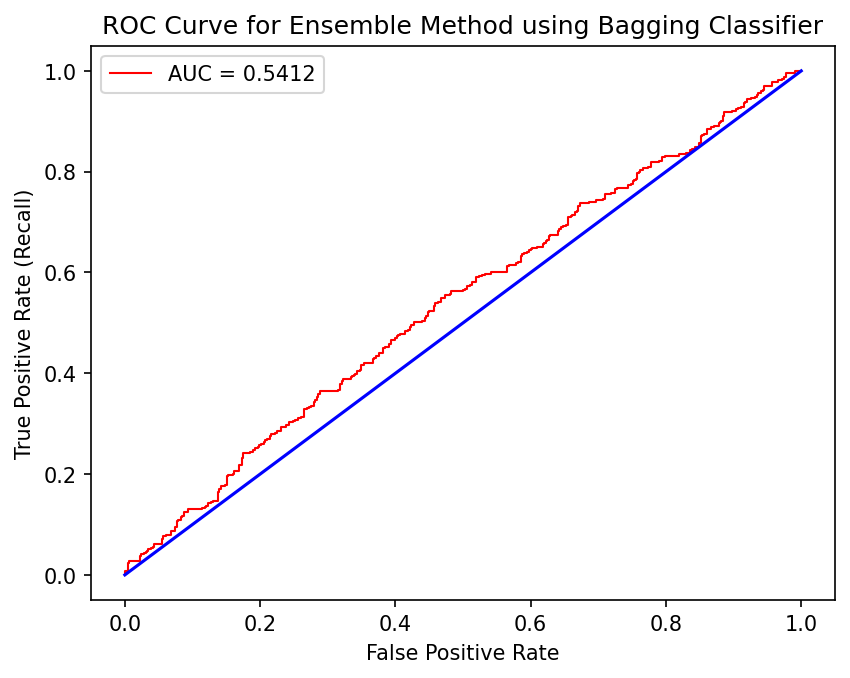

In [62]:
# ROC Curve
stress_cog_y_prob = stress_cog_bagging.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [178]:
# ensemble method using BoostingClassifier()
stress_cog_boosting = GradientBoostingClassifier() 
stress_cog_boosting.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_boosting.predict(stress_cog_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))
print(classification_report(stress_cog_y_test, stress_cog_y_pred))

Accuracy of ensemble method using Boosting Classifier on test set: 0.5253
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       393
           1       0.56      0.57      0.56       458

    accuracy                           0.53       851
   macro avg       0.52      0.52      0.52       851
weighted avg       0.52      0.53      0.52       851



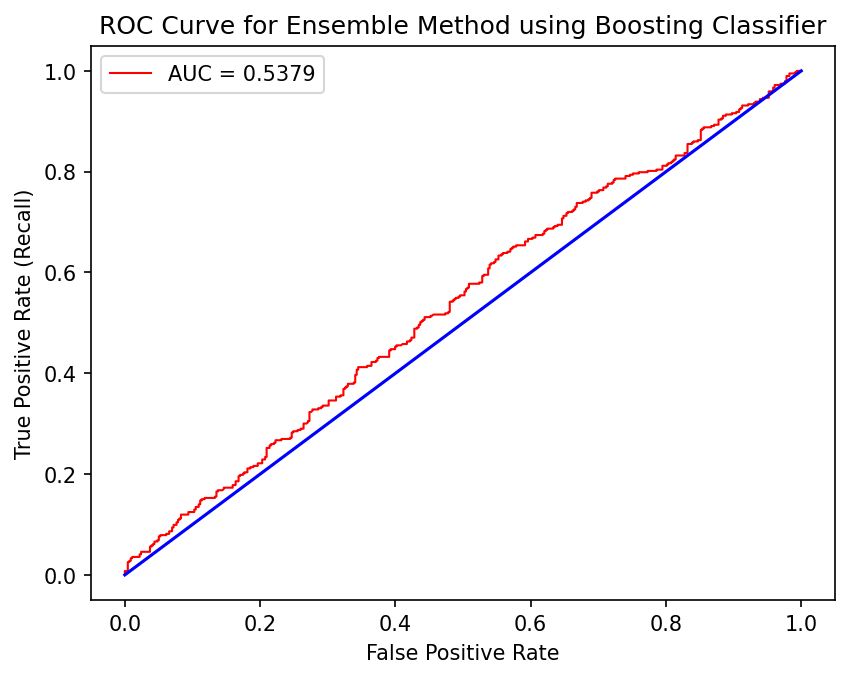

In [64]:
# ROC Curve
stress_cog_y_prob = stress_cog_boosting.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [65]:
# for perceptual/biological processes
stress_percept_bio = stress_analysis.iloc[1 : , 39 : 47].drop(columns = ['lex_liwc_bio'])
stress_percept_bio_X = preprocessing.StandardScaler().fit_transform(stress_percept_bio)
print(stress_percept_bio_X)
stress_percept_bio_y = stress_analysis.iloc[1 : , 0]
print(stress_percept_bio_y)

[[ 0.31524276 -0.54467517 -0.62694536 ... -0.70146538 -0.31258829
  -0.30049107]
 [-0.52132329 -0.54467517 -0.62694536 ... -0.70146538 -0.31258829
  -0.30049107]
 [ 0.47891872 -0.54467517  3.14361114 ... -0.70146538  0.2268328
  -0.02665786]
 ...
 [ 0.83354998 -0.54467517 -0.62694536 ...  1.39766844 -0.31258829
  -0.30049107]
 [ 3.48873787 -0.54467517 -0.62694536 ... -0.70146538 -0.31258829
   0.7874409 ]
 [-0.52132329  2.5730638  -0.62694536 ... -0.70146538 -0.31258829
  -0.30049107]]
1       0
2       1
3       1
4       1
5       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2834, dtype: int64


In [66]:
# split into train and test data
stress_percept_bio_X_train, stress_percept_bio_X_test, stress_percept_bio_y_train, stress_percept_bio_y_test = train_test_split(stress_percept_bio_X, stress_percept_bio_y, test_size=0.30)

In [179]:
# logistic regression
stress_percept_bio_logreg = LogisticRegression()
stress_percept_bio_logreg.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_logreg.predict(stress_percept_bio_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))

Accuracy of logistic regression classifier on test set: 0.6310


[[259 139]
 [175 278]]

 Precision of the model: 
0.6666666666666666

 Recall of the model: 
0.6136865342163356
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       398
           1       0.67      0.61      0.64       453

    accuracy                           0.63       851
   macro avg       0.63      0.63      0.63       851
weighted avg       0.63      0.63      0.63       851



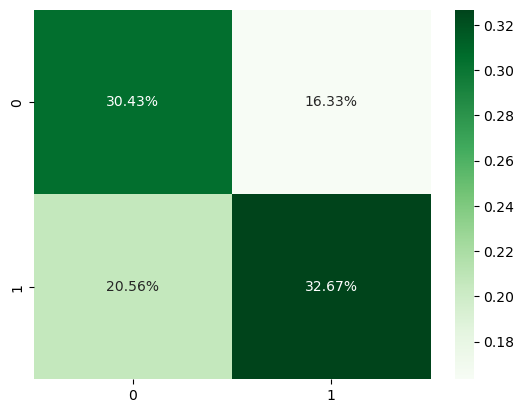

In [180]:
# calculating confusion matrix, precision, recall, ROC curve for logistic regression
# confusion matrix
cf_matrix = confusion_matrix(stress_percept_bio_y_test, stress_percept_bio_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)
print('\n Recall of the model: ')
print(recall)
print(classification_report(stress_percept_bio_y_test, stress_percept_bio_y_pred))

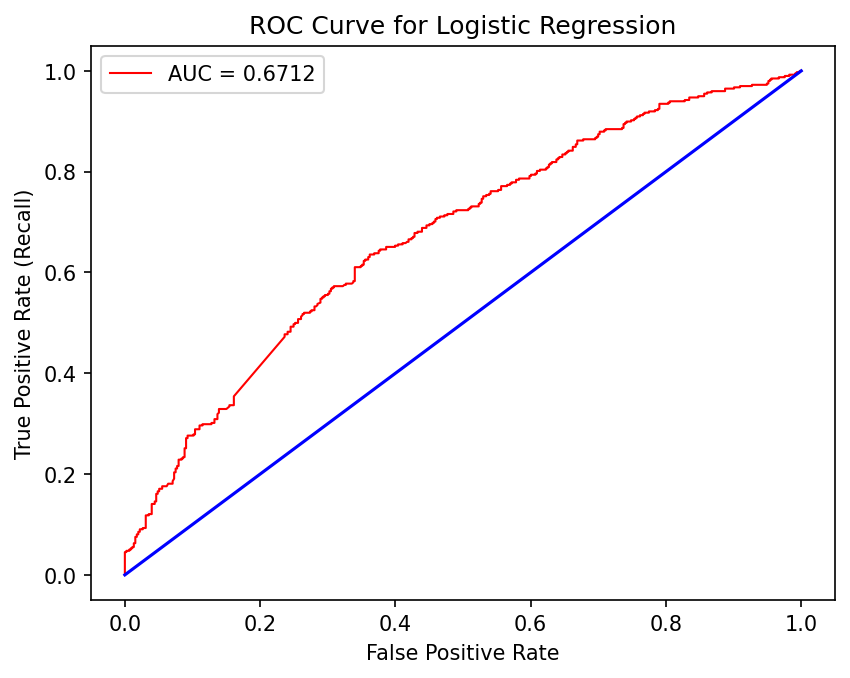

In [117]:
# ROC Curve
stress_percept_bio_y_prob = stress_percept_bio_logreg.predict_proba(stress_percept_bio_X_test)
fpr, tpr, thresholds = roc_curve(stress_percept_bio_y_test, stress_percept_bio_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [181]:
# gaussian naive bayes
stress_percept_bio_gaussianNB = GaussianNB()
stress_percept_bio_gaussianNB.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_gaussianNB.predict(stress_percept_bio_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))
print(classification_report(stress_percept_bio_y_test, stress_percept_bio_y_pred))

Accuracy of gaussian naive bayes classifier on test set: 0.6146
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       398
           1       0.65      0.61      0.63       453

    accuracy                           0.61       851
   macro avg       0.61      0.61      0.61       851
weighted avg       0.62      0.61      0.61       851



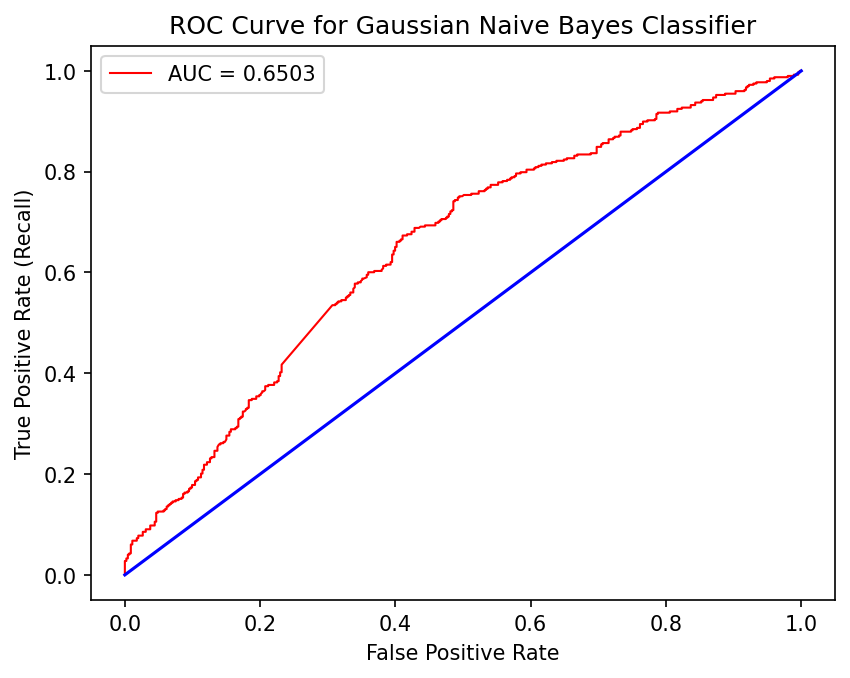

In [120]:
# ROC Curve
stress_percept_bio_y_prob = stress_percept_bio_gaussianNB.predict_proba(stress_percept_bio_X_test)
fpr, tpr, thresholds = roc_curve(stress_percept_bio_y_test, stress_percept_bio_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [182]:
# decision tree classifier
stress_percept_bio_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_percept_bio_dectree.fit(stress_percept_bio_X_train,stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_dectree.predict(stress_percept_bio_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))
print(classification_report(stress_percept_bio_y_test, stress_percept_bio_y_pred))

Accuracy of decision tree classifier on test set: 0.5417
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       398
           1       0.58      0.49      0.53       453

    accuracy                           0.54       851
   macro avg       0.55      0.55      0.54       851
weighted avg       0.55      0.54      0.54       851



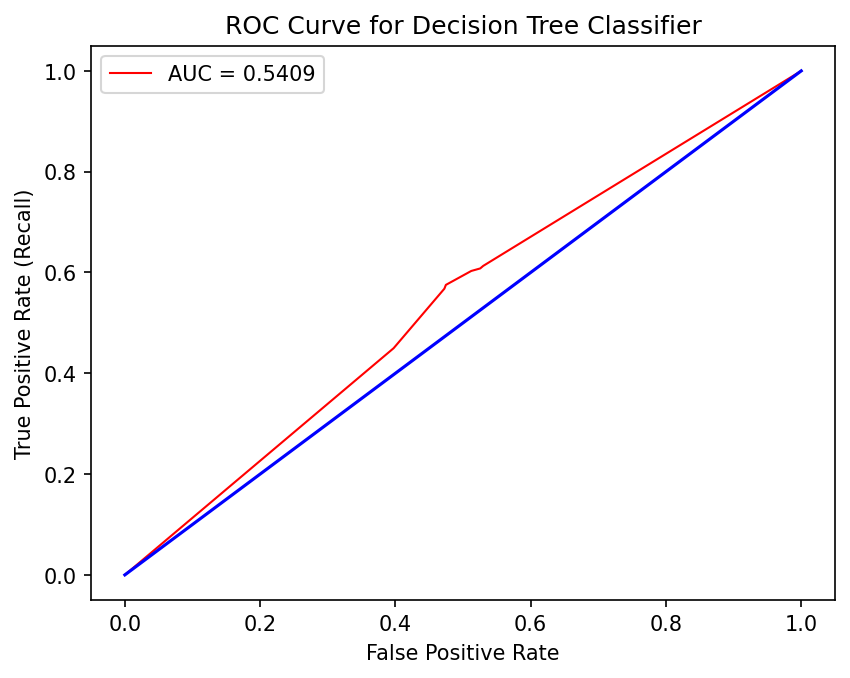

In [122]:
# ROC Curve
stress_percept_bio_y_prob = stress_percept_bio_dectree.predict_proba(stress_percept_bio_X_test)
fpr, tpr, thresholds = roc_curve(stress_percept_bio_y_test, stress_percept_bio_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [162]:
# support vector machines with linear kernel
stress_percept_bio_svm = svm.SVC(kernel="linear")
stress_percept_bio_svm.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_svm.predict(stress_percept_bio_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))
print(classification_report(stress_percept_bio_y_test, stress_percept_bio_y_pred))

Accuracy of support vector machine on test set: 0.6028
              precision    recall  f1-score   support

           0       0.56      0.72      0.63       398
           1       0.67      0.50      0.57       453

    accuracy                           0.60       851
   macro avg       0.61      0.61      0.60       851
weighted avg       0.62      0.60      0.60       851



In [183]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
y_pred_final = ensemble_final_model.predict(stress_percept_bio_X_test)
print(log_loss(stress_percept_bio_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))
print(classification_report(stress_percept_bio_y_test, stress_percept_bio_y_pred))

11.648348727340476
Accuracy of ensemble method (Voting Classifier) on test set: 0.5417
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       398
           1       0.58      0.49      0.53       453

    accuracy                           0.54       851
   macro avg       0.55      0.55      0.54       851
weighted avg       0.55      0.54      0.54       851



In [184]:
# ensemble method using BaggingClassifier()
stress_percept_bio_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_percept_bio_bagging.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_bagging.predict(stress_percept_bio_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))
print(classification_report(stress_percept_bio_y_test, stress_percept_bio_y_pred))

Accuracy of ensemble method using Bagging Classifier on test set: 0.6134
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       398
           1       0.65      0.58      0.62       453

    accuracy                           0.61       851
   macro avg       0.62      0.62      0.61       851
weighted avg       0.62      0.61      0.61       851



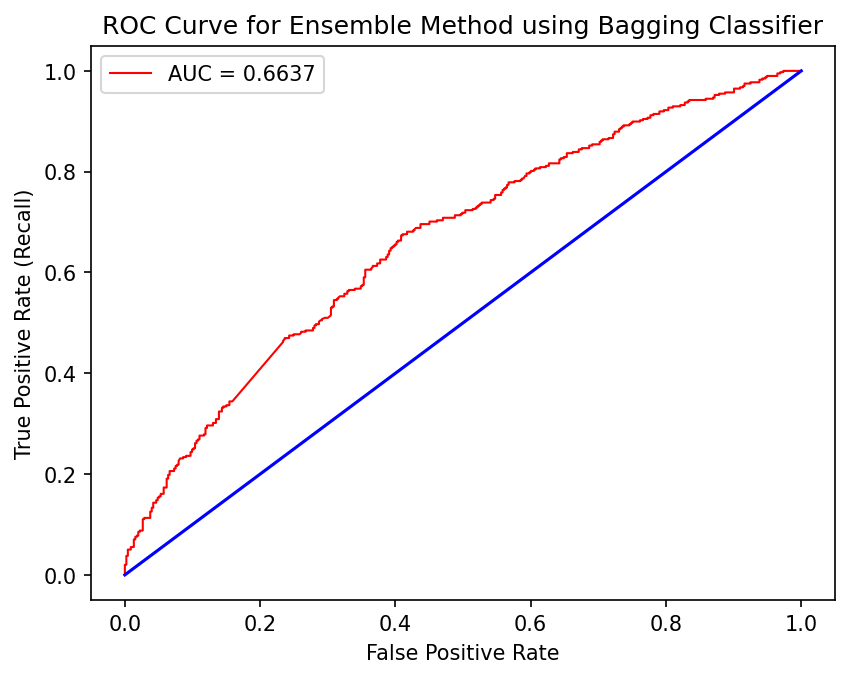

In [124]:
# ROC Curve
stress_percept_bio_y_prob = stress_percept_bio_bagging.predict_proba(stress_percept_bio_X_test)
fpr, tpr, thresholds = roc_curve(stress_percept_bio_y_test, stress_percept_bio_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [185]:
# ensemble method using BoostingClassifier()
stress_percept_bio_boosting = GradientBoostingClassifier() 
stress_percept_bio_boosting.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_boosting.predict(stress_percept_bio_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))
print(classification_report(stress_percept_bio_y_test, stress_percept_bio_y_pred))

Accuracy of ensemble method using Boosting Classifier on test set: 0.6251
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       398
           1       0.67      0.59      0.63       453

    accuracy                           0.63       851
   macro avg       0.63      0.63      0.63       851
weighted avg       0.63      0.63      0.63       851



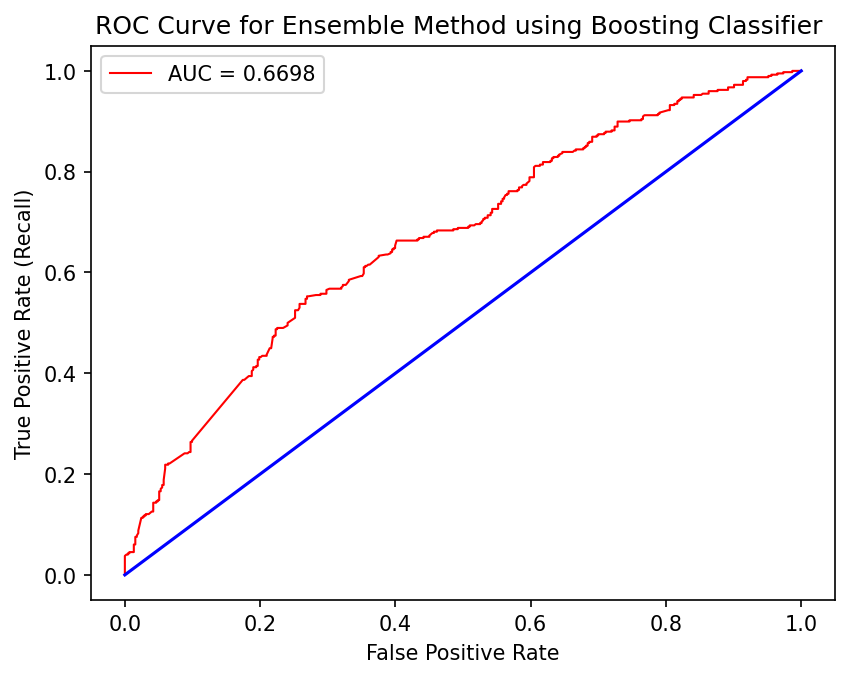

In [126]:
# ROC Curve
stress_percept_bio_y_prob = stress_percept_bio_boosting.predict_proba(stress_percept_bio_X_test)
fpr, tpr, thresholds = roc_curve(stress_percept_bio_y_test, stress_percept_bio_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [79]:
# for time orientations
stress_time_X = preprocessing.StandardScaler().fit_transform(stress_analysis.iloc[1 : , 47 : 50])
print(stress_time_X)
stress_time_y = stress_analysis.iloc[1 : , 0]
print(stress_time_y)

[[-1.01858479  0.25403577 -0.18005093]
 [-0.36206702  0.36227782  0.42523668]
 [ 0.64606888  0.15289156 -0.0562421 ]
 ...
 [-1.24480065 -0.06891591  1.24375062]
 [-1.24480065  1.4659918   1.20935927]
 [ 2.20745009 -0.00858428 -0.81285162]]
1       0
2       1
3       1
4       1
5       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2834, dtype: int64


In [80]:
# split into train and test data
stress_time_X_train, stress_time_X_test, stress_time_y_train, stress_time_y_test = train_test_split(stress_time_X, stress_time_y, test_size=0.30)

In [186]:
# logistic regression
stress_time_logreg = LogisticRegression()
stress_time_logreg.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_logreg.predict(stress_time_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))

Accuracy of logistic regression classifier on test set: 0.5958


[[216 211]
 [133 291]]

 Precision of the model: 
0.5796812749003984

 Recall of the model: 
0.6863207547169812
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       427
           1       0.58      0.69      0.63       424

    accuracy                           0.60       851
   macro avg       0.60      0.60      0.59       851
weighted avg       0.60      0.60      0.59       851



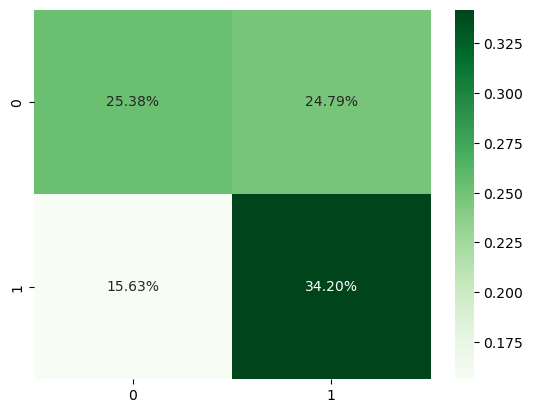

In [187]:
# calculating confusion matrix, precision, recall, ROC curve for logistic regression
# confusion matrix
cf_matrix = confusion_matrix(stress_time_y_test, stress_time_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_time_y_test, stress_time_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_time_y_test, stress_time_y_pred)
print('\n Recall of the model: ')
print(recall)
print(classification_report(stress_time_y_test, stress_time_y_pred))

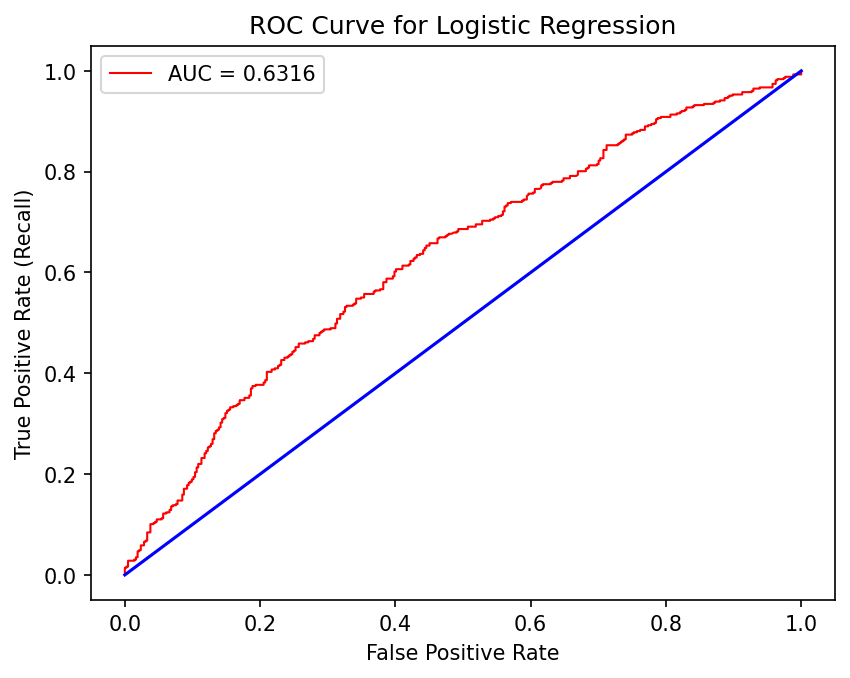

In [127]:
# ROC Curve
stress_time_y_prob = stress_time_logreg.predict_proba(stress_time_X_test)
fpr, tpr, thresholds = roc_curve(stress_time_y_test, stress_time_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [188]:
# gaussian naive bayes
stress_time_gaussianNB = GaussianNB()
stress_time_gaussianNB.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_gaussianNB.predict(stress_time_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))
print(classification_report(stress_time_y_test, stress_time_y_pred))

Accuracy of gaussian naive bayes classifier on test set: 0.5770
              precision    recall  f1-score   support

           0       0.62      0.40      0.49       427
           1       0.56      0.75      0.64       424

    accuracy                           0.58       851
   macro avg       0.59      0.58      0.56       851
weighted avg       0.59      0.58      0.56       851



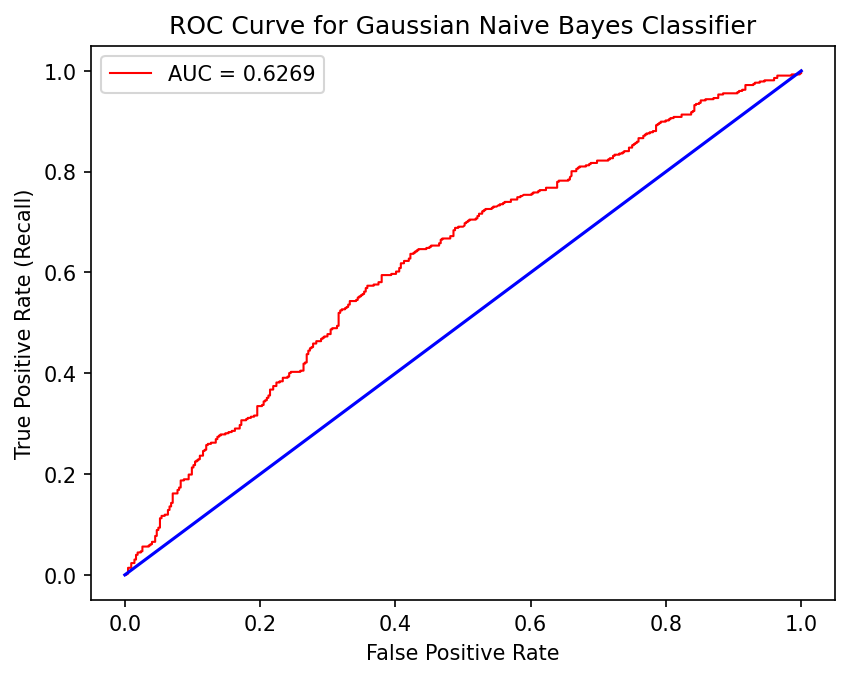

In [130]:
# ROC Curve
stress_time_y_prob = stress_time_gaussianNB.predict_proba(stress_time_X_test)
fpr, tpr, thresholds = roc_curve(stress_time_y_test, stress_time_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [189]:
# decision tree classifier
stress_time_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_time_dectree.fit(stress_time_X_train,stress_time_y_train)
stress_time_y_pred = stress_time_dectree.predict(stress_time_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))
print(classification_report(stress_time_y_test, stress_time_y_pred))

Accuracy of decision tree classifier on test set: 0.5499
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       427
           1       0.55      0.54      0.55       424

    accuracy                           0.55       851
   macro avg       0.55      0.55      0.55       851
weighted avg       0.55      0.55      0.55       851



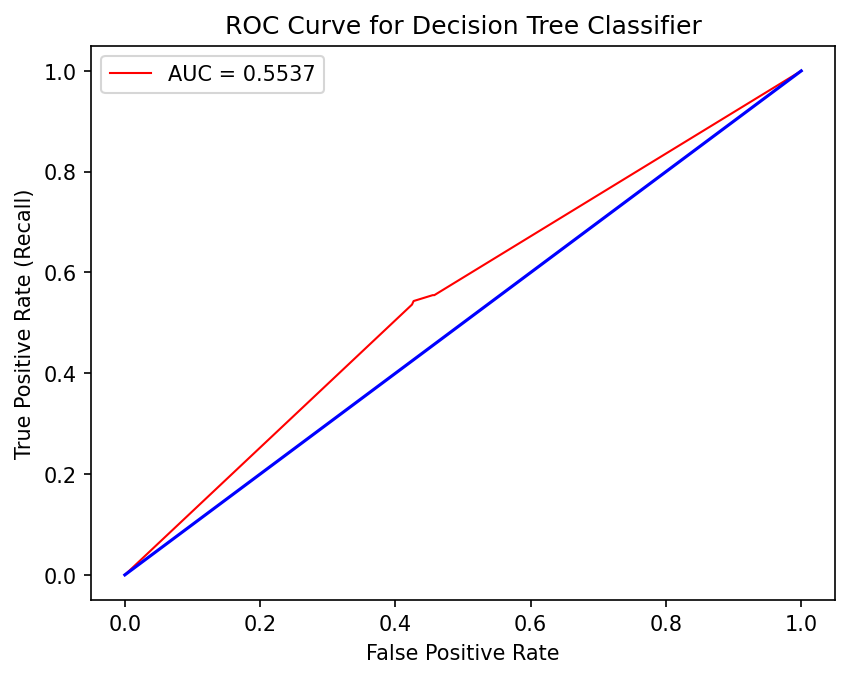

In [132]:
# ROC Curve
stress_time_y_prob = stress_time_dectree.predict_proba(stress_time_X_test)
fpr, tpr, thresholds = roc_curve(stress_time_y_test, stress_time_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [191]:
# support vector machines with linear kernel
stress_time_svm = svm.SVC(kernel="linear")
stress_time_svm.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_svm.predict(stress_time_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))
print(classification_report(stress_time_y_test, stress_time_y_pred))

Accuracy of support vector machine on test set: 0.5969
              precision    recall  f1-score   support

           0       0.61      0.53      0.57       427
           1       0.58      0.67      0.62       424

    accuracy                           0.60       851
   macro avg       0.60      0.60      0.60       851
weighted avg       0.60      0.60      0.60       851



In [192]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_time_X_train, stress_time_y_train)
y_pred_final = ensemble_final_model.predict(stress_time_X_test)
print(log_loss(stress_time_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))
print(classification_report(stress_time_y_test, stress_time_y_pred))

0.7305640059575159
Accuracy of ensemble method (Voting Classifier) on test set: 0.5969
              precision    recall  f1-score   support

           0       0.61      0.53      0.57       427
           1       0.58      0.67      0.62       424

    accuracy                           0.60       851
   macro avg       0.60      0.60      0.60       851
weighted avg       0.60      0.60      0.60       851



In [193]:
# ensemble method using BaggingClassifier()
stress_time_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_time_bagging.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_bagging.predict(stress_time_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))
print(classification_report(stress_time_y_test, stress_time_y_pred))

Accuracy of ensemble method using Bagging Classifier on test set: 0.5969
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       427
           1       0.59      0.64      0.61       424

    accuracy                           0.60       851
   macro avg       0.60      0.60      0.60       851
weighted avg       0.60      0.60      0.60       851




 Recall of the model: 
0.6627358490566038


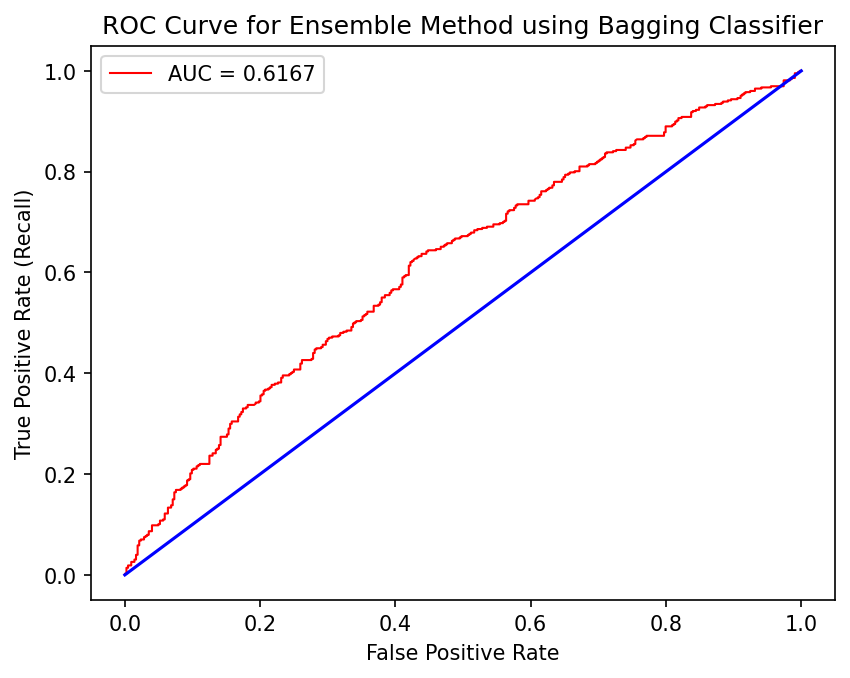

In [134]:
# recall
recall = recall_score(stress_time_y_test, stress_time_y_pred)
print('\n Recall of the model: ')
print(recall)
# ROC Curve
stress_time_y_prob = stress_time_bagging.predict_proba(stress_time_X_test)
fpr, tpr, thresholds = roc_curve(stress_time_y_test, stress_time_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [194]:
# ensemble method using BoostingClassifier()
stress_time_boosting = GradientBoostingClassifier() 
stress_time_boosting.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_boosting.predict(stress_time_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))
print(classification_report(stress_time_y_test, stress_time_y_pred))

Accuracy of ensemble method using Boosting Classifier on test set: 0.6052
              precision    recall  f1-score   support

           0       0.63      0.53      0.57       427
           1       0.59      0.68      0.63       424

    accuracy                           0.61       851
   macro avg       0.61      0.61      0.60       851
weighted avg       0.61      0.61      0.60       851



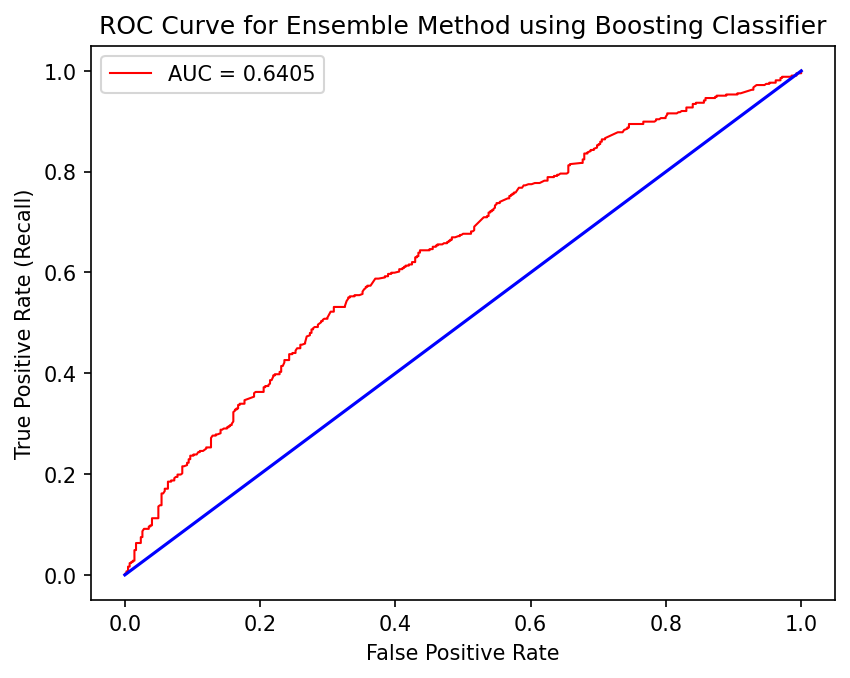

In [136]:
# ROC Curve
stress_time_y_prob = stress_time_boosting.predict_proba(stress_time_X_test)
fpr, tpr, thresholds = roc_curve(stress_time_y_test, stress_time_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [195]:
# all features combined
stress_all = stress_analysis.iloc[1 : , 1 : ].drop(columns=['lex_liwc_function', 'lex_liwc_affect', 'lex_liwc_social', 'lex_liwc_cogproc', 'lex_liwc_percept', 'lex_liwc_bio'])
stress_all_X = preprocessing.StandardScaler().fit_transform(stress_all)
stress_all_y = stress_analysis.iloc[1 : , 0]

In [196]:
# split into train and test data
stress_all_X_train, stress_all_X_test, stress_all_y_train, stress_all_y_test = train_test_split(stress_all_X, stress_all_y, test_size=0.30)

In [197]:
# logistic regression
stress_all_logreg = LogisticRegression()
stress_all_logreg.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_logreg.predict(stress_all_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))

Accuracy of logistic regression classifier on test set: 0.7497


[[301 110]
 [103 337]]

 Precision of the model: 
0.7539149888143176

 Recall of the model: 
0.7659090909090909
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       411
           1       0.75      0.77      0.76       440

    accuracy                           0.75       851
   macro avg       0.75      0.75      0.75       851
weighted avg       0.75      0.75      0.75       851



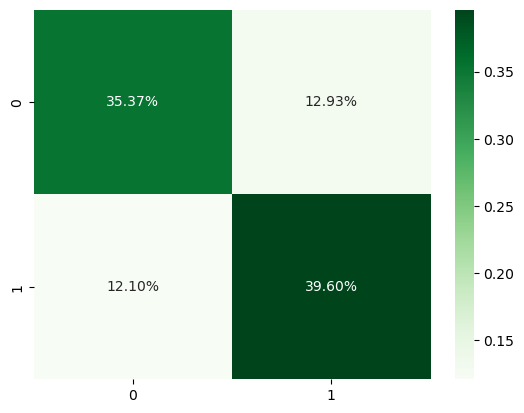

In [198]:
# calculating confusion matrix, precision, recall, ROC curve for logistic regression
# confusion matrix
cf_matrix = confusion_matrix(stress_all_y_test, stress_all_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_all_y_test, stress_all_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_all_y_test, stress_all_y_pred)
print('\n Recall of the model: ')
print(recall)
print(classification_report(stress_all_y_test, stress_all_y_pred))

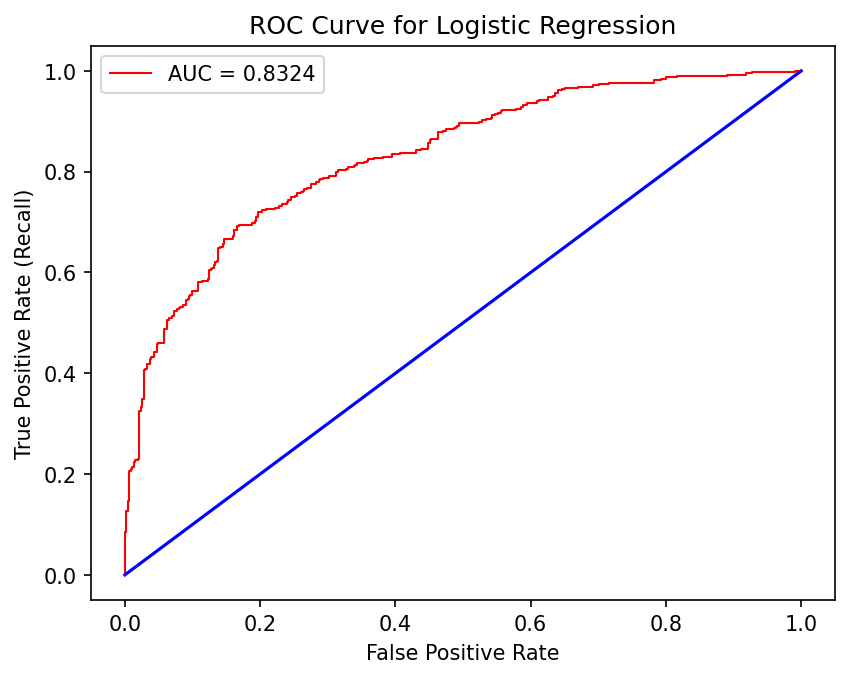

In [138]:
# ROC Curve
stress_all_y_prob = stress_all_logreg.predict_proba(stress_all_X_test)
fpr, tpr, thresholds = roc_curve(stress_all_y_test, stress_all_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [199]:
# gaussian naive bayes
stress_all_gaussianNB = GaussianNB()
stress_all_gaussianNB.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_gaussianNB.predict(stress_all_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))
print(classification_report(stress_all_y_test, stress_all_y_pred))

Accuracy of gaussian naive bayes classifier on test set: 0.7532
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       411
           1       0.76      0.76      0.76       440

    accuracy                           0.75       851
   macro avg       0.75      0.75      0.75       851
weighted avg       0.75      0.75      0.75       851



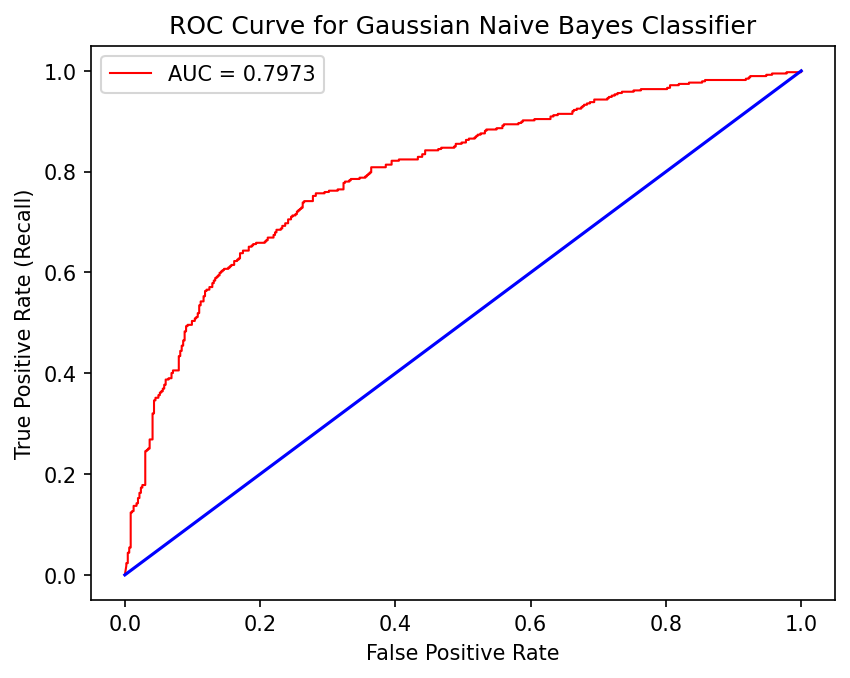

In [141]:
# ROC Curve
stress_all_y_prob = stress_all_gaussianNB.predict_proba(stress_all_X_test)
fpr, tpr, thresholds = roc_curve(stress_all_y_test, stress_all_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [200]:
# decision tree classifier
stress_all_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_all_dectree.fit(stress_all_X_train,stress_all_y_train)
stress_all_y_pred = stress_all_dectree.predict(stress_all_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))
print(classification_report(stress_all_y_test, stress_all_y_pred))

Accuracy of decision tree classifier on test set: 0.6710
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       411
           1       0.69      0.67      0.68       440

    accuracy                           0.67       851
   macro avg       0.67      0.67      0.67       851
weighted avg       0.67      0.67      0.67       851



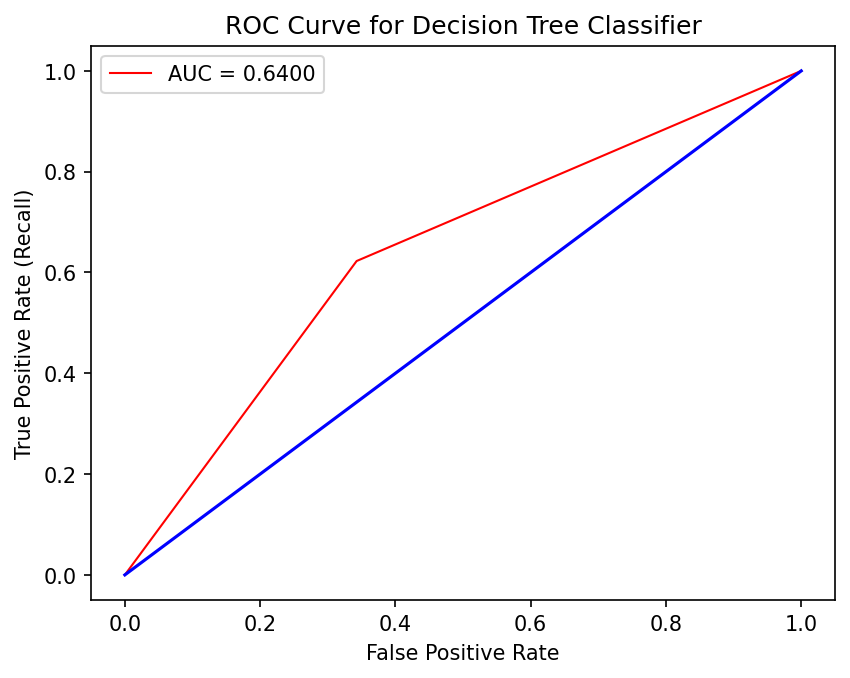

In [143]:
# ROC Curve
stress_all_y_prob = stress_all_dectree.predict_proba(stress_all_X_test)
fpr, tpr, thresholds = roc_curve(stress_all_y_test, stress_all_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [160]:
# support vector machines with linear kernel
stress_all_svm = svm.SVC(kernel="linear")
stress_all_svm.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_svm.predict(stress_all_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))
print(classification_report(stress_all_y_test, stress_all_y_pred))

Accuracy of support vector machine on test set: 0.7509
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       387
           1       0.78      0.76      0.77       464

    accuracy                           0.75       851
   macro avg       0.75      0.75      0.75       851
weighted avg       0.75      0.75      0.75       851



In [201]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_all_X_train, stress_all_y_train)
y_pred_final = ensemble_final_model.predict(stress_all_X_test)
print(log_loss(stress_all_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))
print(classification_report(stress_all_y_test, stress_all_y_pred))

8.888470014309123
Accuracy of ensemble method (Voting Classifier) on test set: 0.6710
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       411
           1       0.69      0.67      0.68       440

    accuracy                           0.67       851
   macro avg       0.67      0.67      0.67       851
weighted avg       0.67      0.67      0.67       851



In [202]:
# ensemble method using BaggingClassifier()
stress_all_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_all_bagging.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_bagging.predict(stress_all_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))
print(classification_report(stress_all_y_test, stress_all_y_pred))

Accuracy of ensemble method using Bagging Classifier on test set: 0.7544
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       411
           1       0.75      0.78      0.77       440

    accuracy                           0.75       851
   macro avg       0.75      0.75      0.75       851
weighted avg       0.75      0.75      0.75       851



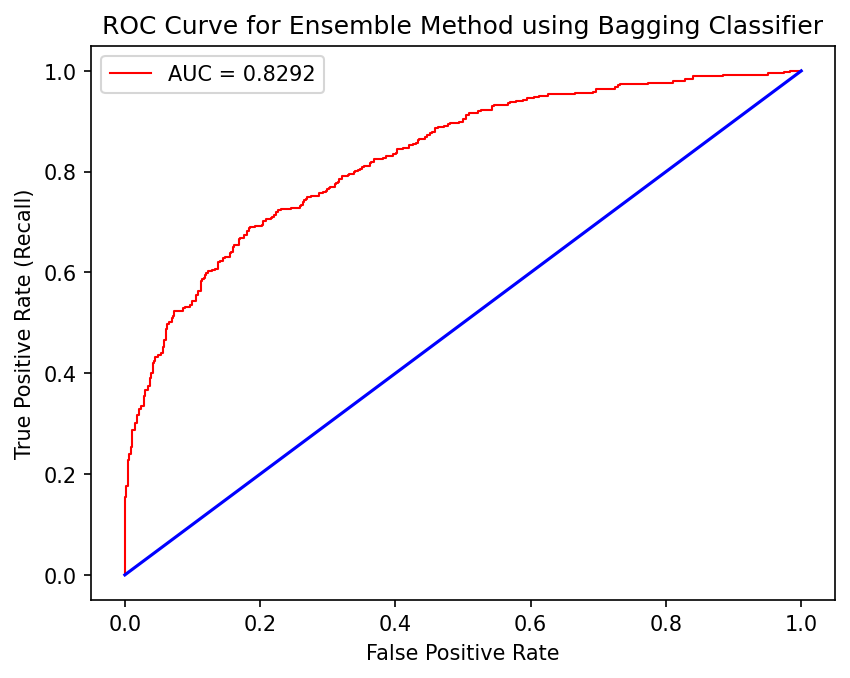

In [145]:
# ROC Curve
stress_all_y_prob = stress_all_bagging.predict_proba(stress_all_X_test)
fpr, tpr, thresholds = roc_curve(stress_all_y_test, stress_all_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [203]:
# ensemble method using BoostingClassifier()
stress_all_boosting = GradientBoostingClassifier() 
stress_all_boosting.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_boosting.predict(stress_all_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))
print(classification_report(stress_all_y_test, stress_all_y_pred))

Accuracy of ensemble method using Boosting Classifier on test set: 0.7509
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       411
           1       0.75      0.78      0.76       440

    accuracy                           0.75       851
   macro avg       0.75      0.75      0.75       851
weighted avg       0.75      0.75      0.75       851



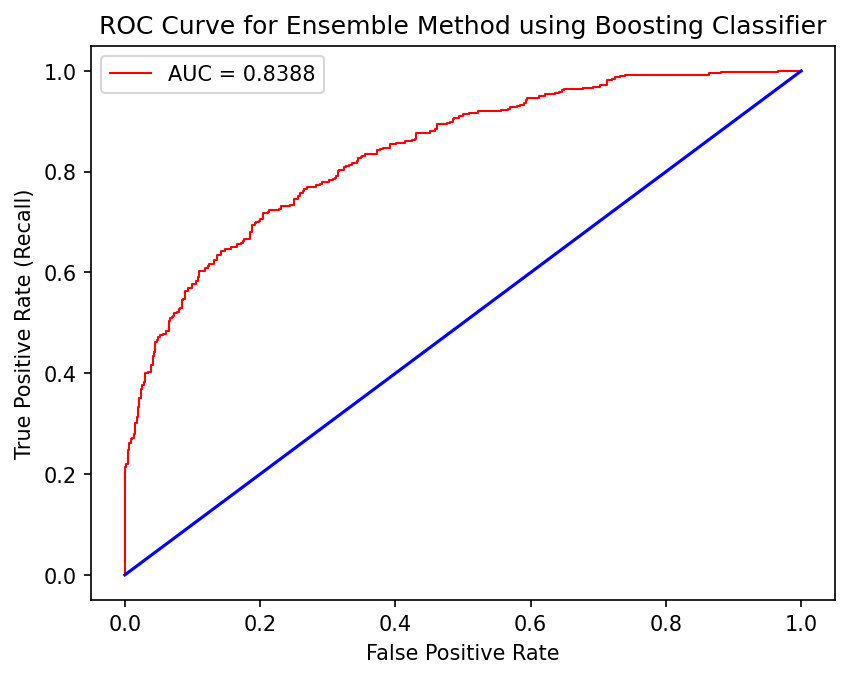

In [147]:
# ROC Curve
stress_all_y_prob = stress_all_boosting.predict_proba(stress_all_X_test)
fpr, tpr, thresholds = roc_curve(stress_all_y_test, stress_all_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {area_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()